# Project : AllLife Bank Personal Loan Campaign Modelling

### Description
#### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.
 
### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import roc_curve, confusion_matrix, precision_recall_curve

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data into pandas dataframe
data = pd.read_csv("Loan_Modelling.csv")

# Make another copy of data
df = data.copy()

## Overview of the data 

In [3]:
df.shape

(5000, 14)

In [4]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

* There is no summary row
* ID appears to be identical to the dataframe index and therefore unlikely to provide any useful information but we will keep in the dataset and drop it during our regression anaylysis
* Column titles appear to be in good format

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All varibales are numeric

In [7]:
df.isnull().values.any() # If there are any null values in data set

False

In [8]:
data.describe().T


count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* Experience has negative numbers which will need to be processed
* Income may have outliers and appears to be skewed right
* Population appears to average higher education levels
* Mortgage has 0 values which may skew our analysis as the median customer does not have a mortgage. There appears to be outliers in the upper range.
* Personal_Loan, Securities_Account, CD_Account, Online, and, CreditCard appear to be boolean values 

In [9]:
# Filter the object type columns
columns = data.columns
columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
# observe count by Experience to identify negative numbers
df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

* there are three negative values:counts [-1:33, -2:15, 13:4] 

In [11]:
# replace negative numbers with zero
df = df.replace({'Experience':{-1:0, -2:0, -3:0}})
df['Experience'].value_counts()                

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
34    125
17    125
27    125
22    124
29    124
7     121
15    119
8     119
6     119
0     118
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
39     85
2      85
1      74
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

In [12]:
# look at number of zipcodes

df.ZIPCode.nunique()

467

* there are 467 different unique zipcodes. Perhaps we can group them by city, county, state, or country to reduce the dimension of the data

In [13]:
# import zipcode database
!pip install uszipcode
from uszipcode import SearchEngine, SimpleZipcode
search = SearchEngine()

In [14]:
# quick test to take a look at the columns in the database
search.by_zipcode(11211)

SimpleZipcode(zipcode='11211', zipcode_type='Standard', major_city='Brooklyn', post_office_city='Brooklyn, NY', common_city_list=['Brooklyn'], county='Kings County', state='NY', lat=40.71, lng=-73.95, timezone='Eastern', radius_in_miles=2.0, area_code_list=['347', '718', '917'], population=90117, population_density=39209.0, land_area_in_sqmi=2.3, water_area_in_sqmi=0.07, housing_units=37180, occupied_housing_units=33489, median_home_value=655500, median_household_income=46848, bounds_west=-73.976639, bounds_east=-73.923043, bounds_north=40.727849, bounds_south=40.697636)

In [15]:
# create function to lookup city by zipcode and create a new column 

def zipcity(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x)).major_city
        return city if city else x

df['City'] = df['ZIPCode'].apply(zipcity)
df.head()


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City  
0       Pasadena  
1    Los Angeles  
2       Berkeley  
3  San Francisco  
4     Northridge

In [16]:
df['City'].value_counts() 

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
93077              1
Ladera Ranch       1
Stinson Beach      1
Tahoe City         1
Sierra Madre       1
Name: City, Length: 248, dtype: int64

In [17]:
# create function to lookup state by zipcode and create a new column 


def zipstate(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x)).state
        return city if city else x

df['State'] = df['ZIPCode'].apply(zipstate)
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City State  
0       Pasadena    CA  
1    Los Angeles    CA  
2       Berkeley    CA  
3  San Francisco    CA  
4     Northridge    CA

In [18]:
df['State'].value_counts() 

CA       4966
92717      22
96651       6
92634       5
93077       1
Name: State, dtype: int64

* It looks like there is only CA which makes this column useless for improving the model
* Drop the column

In [19]:
df.drop(['State'],axis=1,inplace=True)
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City  
0       Pasadena  
1    Los Angeles  
2       Berkeley  
3  San Francisco  
4     Northridge

In [20]:
# create function to lookup state by zipcode and create a new column 


def zipcounty(x):
    if pd.isnull(x):
        return None
    else:
        city = search.by_zipcode(int(x)).county
        return city if city else x

df['County'] = df['ZIPCode'].apply(zipcounty)
df.head()


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City                County  
0       Pasadena    Los Angeles County  
1    Los Angeles    Los Angeles County  
2       Berkeley        Alameda County  
3  San Francisco  San Francisco County  
4     Northridge    Los Angeles County

In [21]:
df['County'].value_counts() 

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

* There are 4 zipcodes which do not have a complete match in the database [92717, 96651, 92634, 93077]
* 92717 is the most plentiful with 22 records thus, we do not want to set them to "unknown" if not necessary. A search of zipcodes with "927xx" prefix shows that all matches are in Orange County and 11 of 16 are in the city of Santa Ana. I am comfortable replacing these values
* 96651 is an Fleet Post office which is located on a Naval Base. Because there are multiple Naval Bases in CA we cannot make a clear determination of its location but I believe "Naval Base" should provide valuable info asa county. City remains "unknown".
* 92634 did not match but a lookup of zipcodes with "926xx" prefix shows that all matches are in Orange County but city is "unknown." 
* 93077 did not match however zipcodes with "930xx" prefix shows that most matches are in Ventura County but city is "unknown." 
* Replacements will be made

In [22]:
# Replace missing county values

df['County'] = df['County'].replace([92717], 'Orange County').replace([96651], 'Naval Base').replace([92634], 'Orange County').replace([93077], 'Ventura County')
                
df['County'].value_counts() 

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             115
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

In [23]:
# create new data frame by spliting County column on " County" to simply column dagta and converting to string

county_split = df["County"].str.split(" County", n = 1, expand = True) 
county_split.head()

0 1
0    Los Angeles  
1    Los Angeles  
2        Alameda  
3  San Francisco  
4    Los Angeles

In [24]:
# clean up County column and delete

df.drop(['County'], axis=1, inplace=True)
df["County"]= county_split[0]

del county_split # delete dataframe since it's not need and can free up memory
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City         County  
0       Pasadena    Los Angeles  
1    Los Angeles    Los Angeles  
2       Berkeley        Alameda  
3  San Francisco  San Francisco  
4     Northridge    Los Angeles

In [25]:
df['County'].value_counts() 

Los Angeles        1095
San Diego           568
Santa Clara         563
Alameda             500
Orange              366
San Francisco       257
San Mateo           204
Sacramento          184
Santa Barbara       154
Yolo                130
Monterey            128
Ventura             115
San Bernardino      101
Contra Costa         85
Santa Cruz           68
Riverside            56
Marin                54
Kern                 54
San Luis Obispo      33
Solano               33
Humboldt             32
Sonoma               28
Fresno               26
Placer               24
Butte                19
Shasta               18
El Dorado            17
Stanislaus           15
San Benito           14
San Joaquin          13
Mendocino             8
Tuolumne              7
Siskiyou              7
Naval Base            6
Trinity               4
Lake                  4
Merced                4
Napa                  3
Imperial              3
Name: County, dtype: int64

In [26]:
# remove spaces
df.County = df.County.str.replace(" ", "_")
df['County'].value_counts() 

Los_Angeles        1095
San_Diego           568
Santa_Clara         563
Alameda             500
Orange              366
San_Francisco       257
San_Mateo           204
Sacramento          184
Santa_Barbara       154
Yolo                130
Monterey            128
Ventura             115
San_Bernardino      101
Contra_Costa         85
Santa_Cruz           68
Riverside            56
Marin                54
Kern                 54
San_Luis_Obispo      33
Solano               33
Humboldt             32
Sonoma               28
Fresno               26
Placer               24
Butte                19
Shasta               18
El_Dorado            17
Stanislaus           15
San_Benito           14
San_Joaquin          13
Mendocino             8
Tuolumne              7
Siskiyou              7
Naval_Base            6
Lake                  4
Trinity               4
Merced                4
Imperial              3
Napa                  3
Name: County, dtype: int64

In [27]:
# Replace missing city values

df['City'] = df['City'].replace([92717], 'Santa Ana').replace([96651], 'Unknown').replace([92634], 'Unknown').replace([93077], 'Unknown')
                
df['City'].value_counts() 

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Stinson Beach      1
Ladera Ranch       1
Sierra Madre       1
Tahoe City         1
Sausalito          1
Name: City, Length: 245, dtype: int64

In [28]:
# remove spaces from City names

df.City = df.City.str.replace(" ", "_")
df['City'].value_counts() 
df['City'].value_counts() 

Los_Angeles      375
San_Diego        269
San_Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sierra_Madre       1
Ladera_Ranch       1
Sausalito          1
Stinson_Beach      1
Tahoe_City         1
Name: City, Length: 245, dtype: int64

In [29]:
# observe dataset characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  City                5000 non-null   object 
 15  County              5000 non-null   object 
dtypes: flo

In [30]:
# Converting object type column to category type
df['City'] = df['City'].astype('category')
df['County'] = df['County'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  City                5000 non-null   category
 15  County              5000 non-null   ca

In [31]:
df['Personal_Loan'].value_counts() 

0    4520
1     480
Name: Personal_Loan, dtype: int64

* Data is ready to perform EDA

# Exploratory Data Analysis

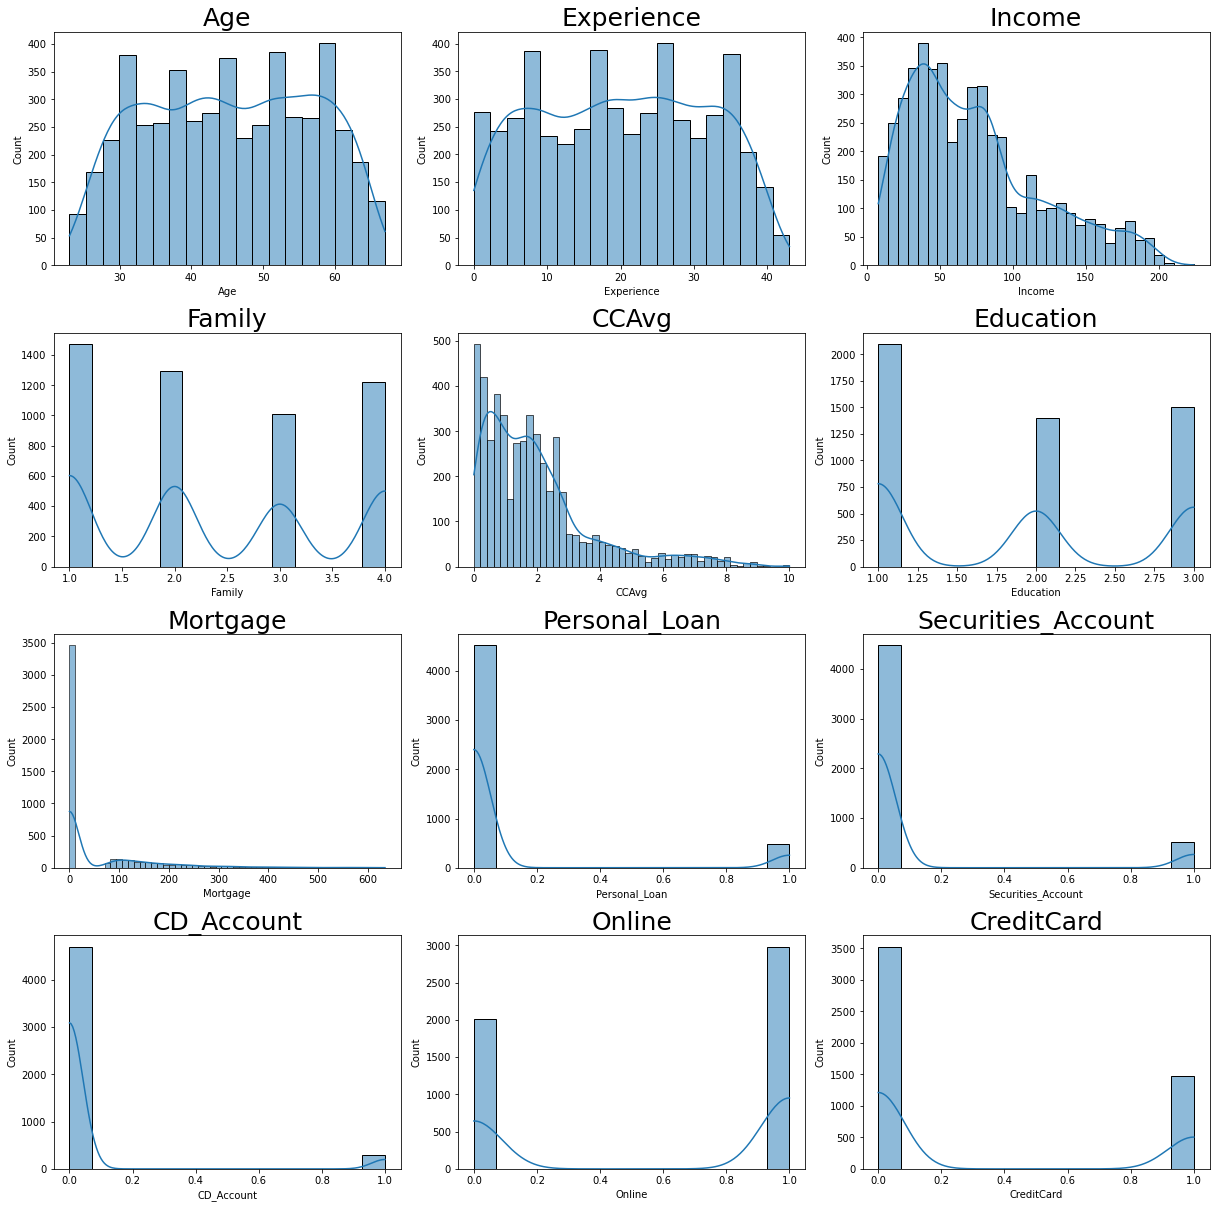

In [32]:
# lets plot histogram of all numerical variables to check for normality vs. skewness

all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove("ID")
all_col.remove("ZIPCode")
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    #plt.hist(data[all_col[i]])
    sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

* Experience and Age appear to by highly correlated
* Income and CCAvg are both skewwed and appear to be related
* Mortgage is also highly skewed

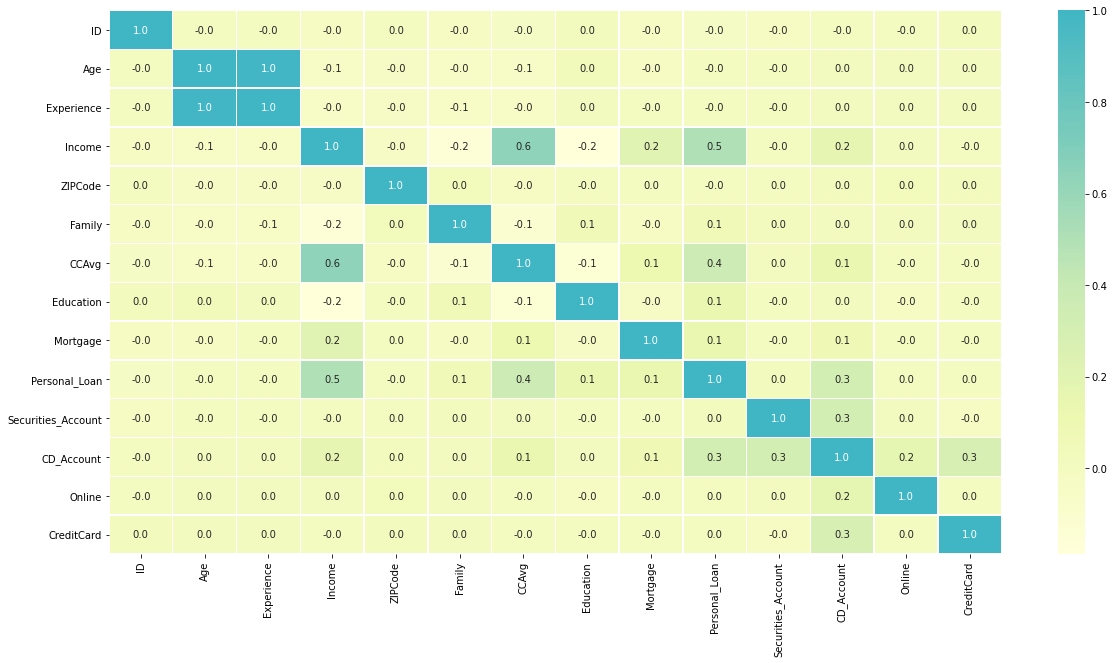

In [33]:
# heatmap of numerical values

plt.figure(figsize=(20,10)) # set size of plot
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1, cmap='YlGnBu')  # set line widths, format, and color
plt.show()

* Confirms Age and Expereince have perfect correlation and one of these columns will need to be excluded from the model
* Income and CCAvg have a 0.6 correlation
* Income and CCAvg are correlated with Personal Loan at 0.5 and 0.4 respectively

## Univariate Analysis

In [34]:
# using function from earlier lesson to check skewness using combination graph of boxplot and histogram 
# this is a useful tool for doing univariate analysis of numerical values to study central tendency and dispersion

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=True, ax=ax_hist2, bins=bins, pallette='winter') if bins else sns.histplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

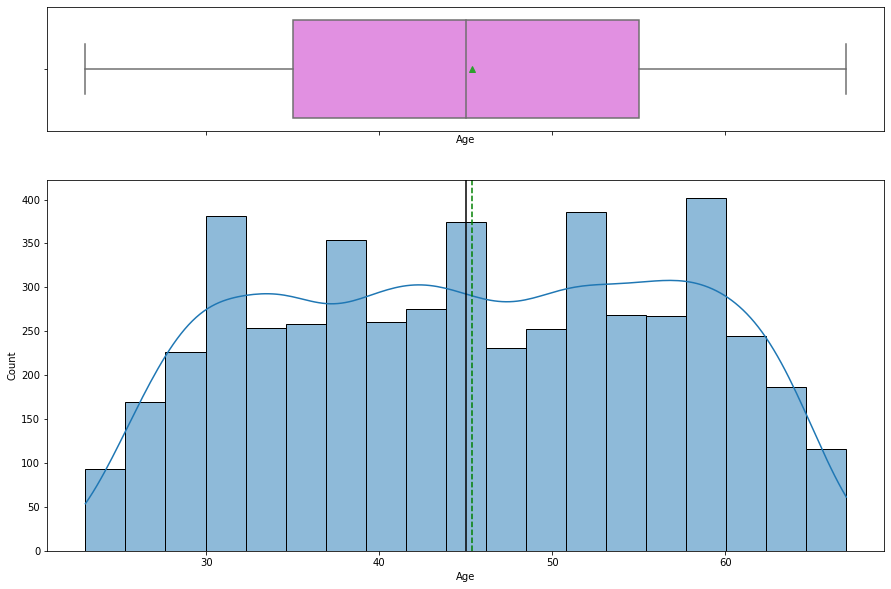

In [35]:
histogram_boxplot(data.Age)

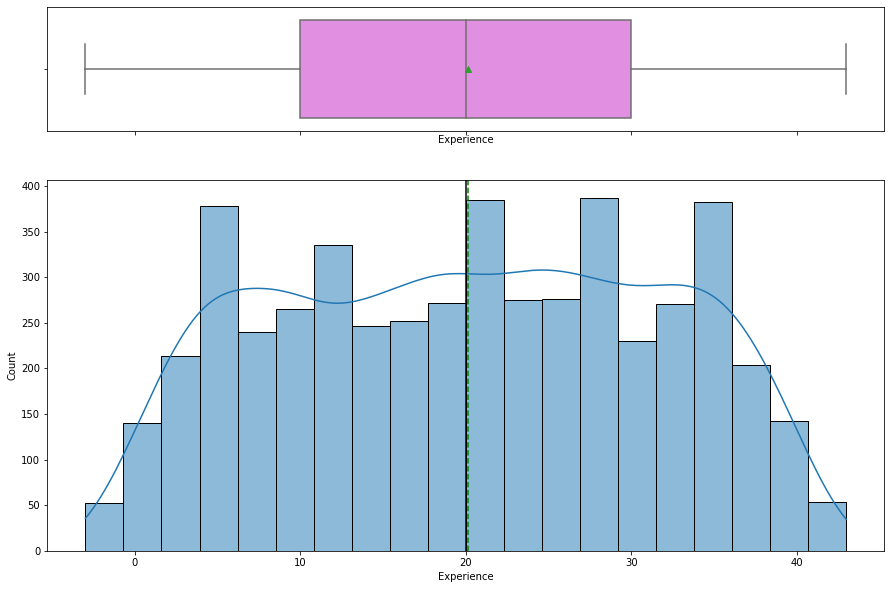

In [36]:
histogram_boxplot(data.Experience)

* Age and Experience are highly correlated and have a similar shape

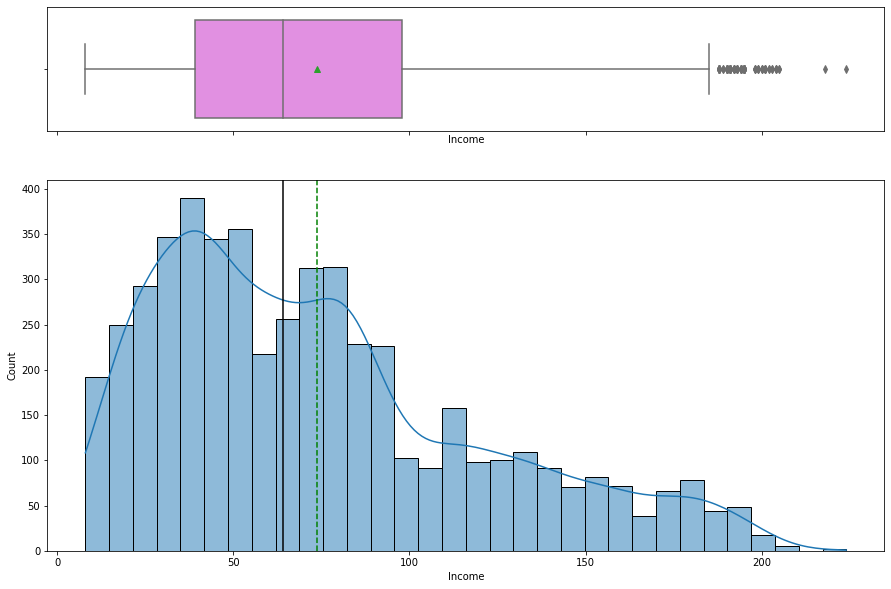

In [37]:
histogram_boxplot(data.Income)

- The distribution of Income is right skewed
- The boxplot shows that there are outliers at the right end
- Outliers may represent a trend but we will group to reduce dimensionality

In [38]:
# group Income into bins to reduce dimensionality

bins= [0,26,51,76,101,126,151,501]
labels = ['<25K','26-50K','51-75K','76-100K','101-125K','126-150','>151K']
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)
df.groupby('Income_Group')['Income'].count()

Income_Group
<25K         672
26-50K      1242
51-75K      1044
76-100K      830
101-125K     441
126-150      329
>151K        442
Name: Income, dtype: int64

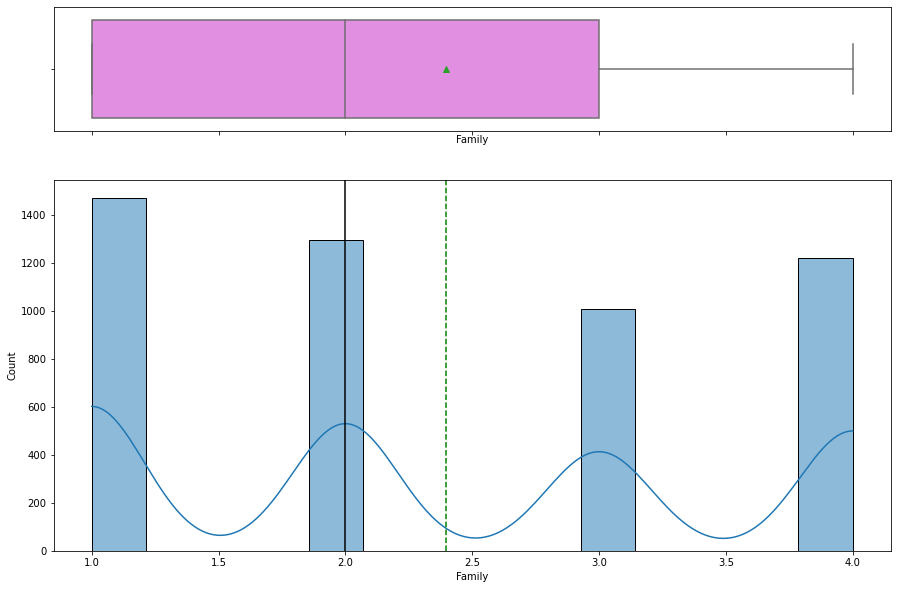

In [39]:
histogram_boxplot(data.Family)

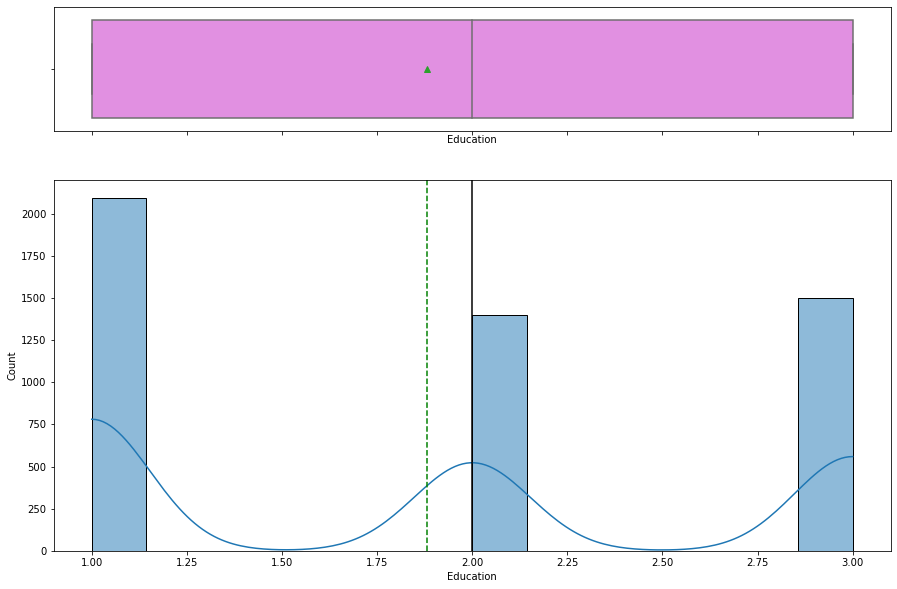

In [40]:
histogram_boxplot(data.Education)

* Number of family members is fairly evenly distributed across the different categories

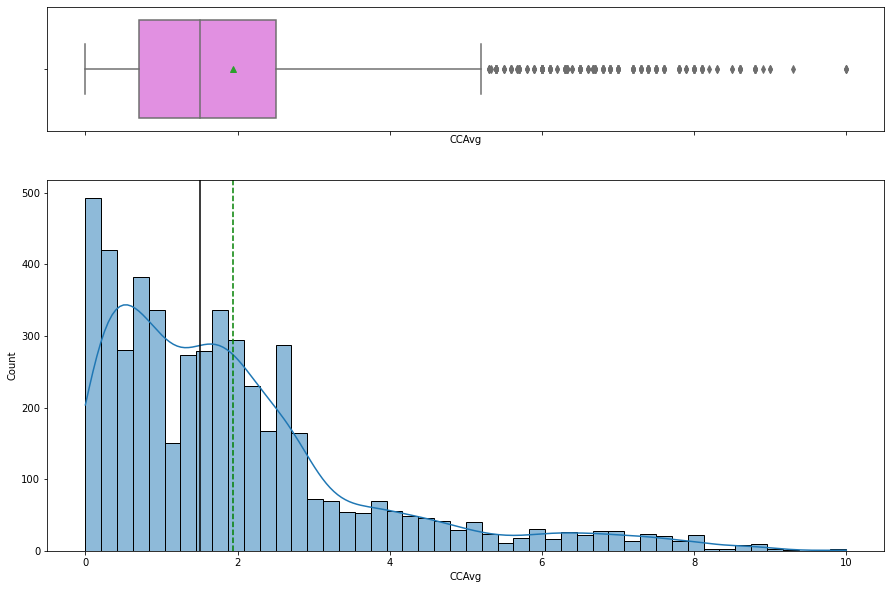

In [41]:
histogram_boxplot(data.CCAvg)

- The distribution of CCAvg is right skewed
- The boxplot shows that there are outliers at the right end
- CCAvg variation may be a key market trend which might not make sense to treat by clipping
- Grouping into bins may make more sense

In [42]:
# group CCAvg into bins to reduce dimensionality

bins= [0,1,2,3,4,5,6,100]
labels = ['<1K','1<2K','2<3K','3<4K','4<5K','5<6K','>6K']
df['CCAvg_Group'] = pd.cut(df['CCAvg'], bins=bins, labels=labels, right=False)
df.groupby('CCAvg_Group')['CCAvg'].count()

CCAvg_Group
<1K     1683
1<2K    1376
2<3K    1039
3<4K     319
4<5K     219
5<6K      97
>6K      267
Name: CCAvg, dtype: int64

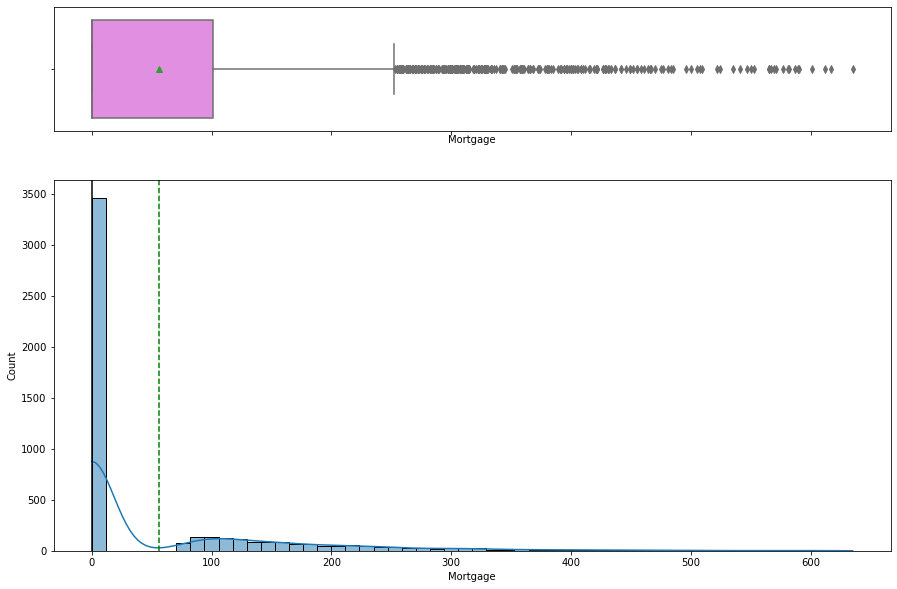

In [43]:
histogram_boxplot(data.Mortgage)

- The distribution of Mortgage is right skewed
- The boxplot shows that there are outliers at the right end
- Mortgage variation may be a key market trend which might not make sense to treat by clipping
- It may make sense to group into several categories to simplify the data model

In [44]:
# group Mortgage into bins to reduce dimensionality

bins= [0,1,101,201,301,401,636]
labels = ['none','<100K','101-200K','201-300K','301-400K','>401K']
df['Mortgage_Group'] = pd.cut(df['Mortgage'], bins=bins, labels=labels, right=False)


In [45]:
# check for nulls

df.isnull().sum().sort_values(ascending=False)

Mortgage_Group        0
Mortgage              0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Personal_Loan         0
CCAvg_Group           0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
County                0
Income_Group          0
ID                    0
dtype: int64

In [46]:
# observe Mortgage_Group groupings

df.groupby('Mortgage_Group')['Mortgage'].count()

Mortgage_Group
none        3462
<100K        282
101-200K     758
201-300K     297
301-400K     128
>401K         73
Name: Mortgage, dtype: int64

In [47]:
# Observe number of unique values

df.nunique().sort_values(ascending=False)

ID                    5000
ZIPCode                467
Mortgage               347
City                   245
Income                 162
CCAvg                  108
Age                     45
Experience              44
County                  39
Income_Group             7
CCAvg_Group              7
Mortgage_Group           6
Family                   4
Education                3
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
Personal_Loan            2
dtype: int64

In [48]:
# take a look at the categorical values in the dataset

df.describe(include='category')

City       County Income_Group CCAvg_Group Mortgage_Group
count          5000         5000         5000        5000           5000
unique          245           39            7           7              6
top     Los_Angeles  Los_Angeles       26-50K         <1K           none
freq            375         1095         1242        1683           3462

In [49]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

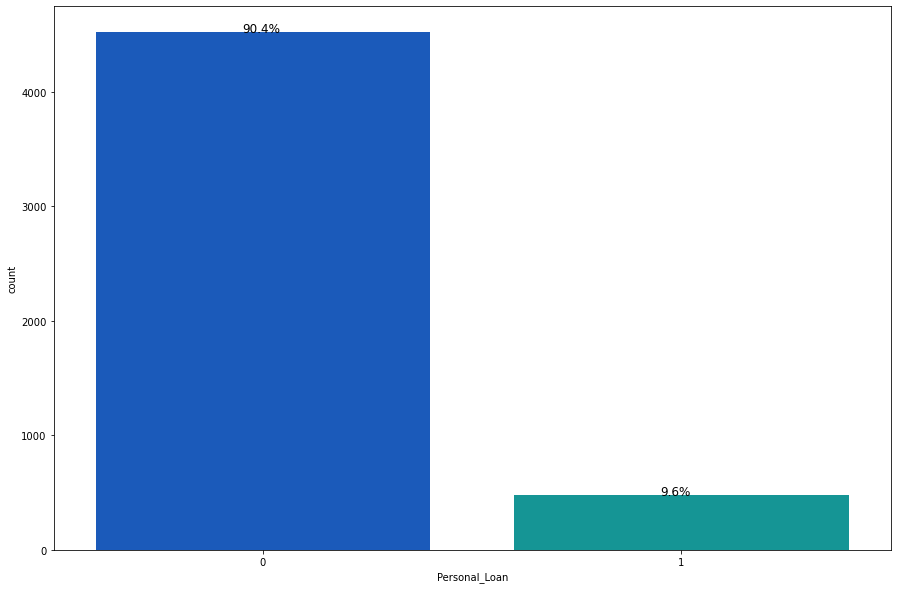

In [50]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Personal_Loan"],palette='winter')
perc_on_bar(ax,df["Personal_Loan"])

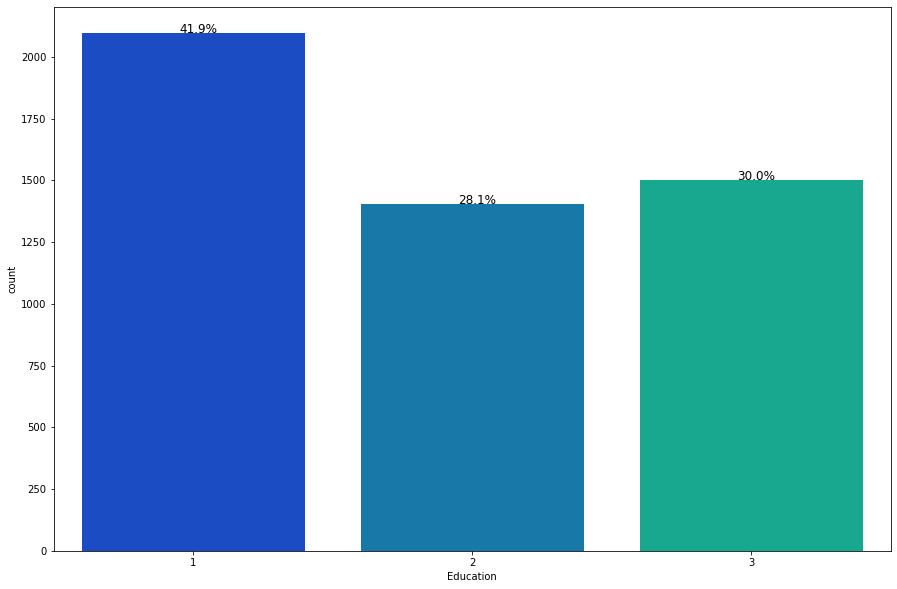

In [51]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Education"],palette='winter')
perc_on_bar(ax,df["Education"])

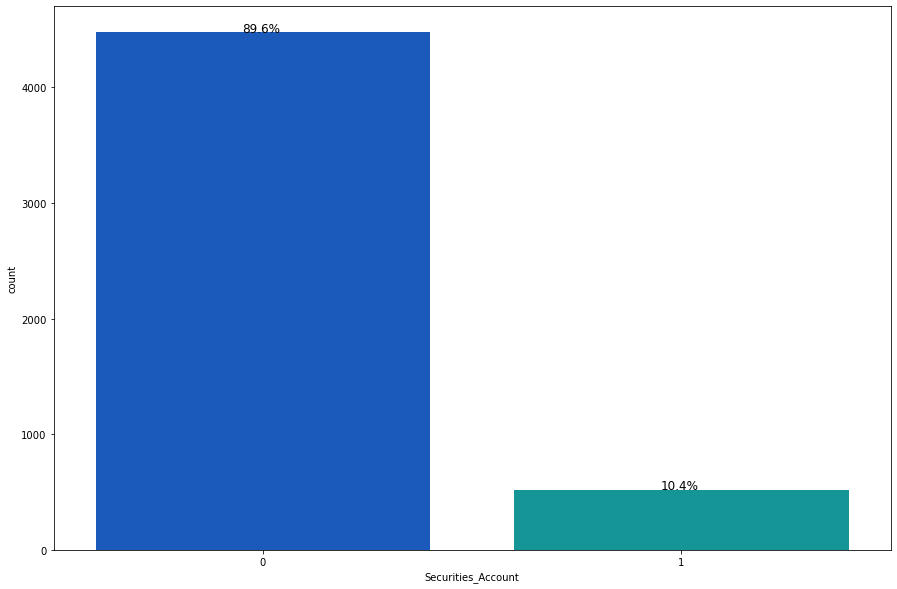

In [52]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Securities_Account"],palette='winter')
perc_on_bar(ax,df["Securities_Account"])

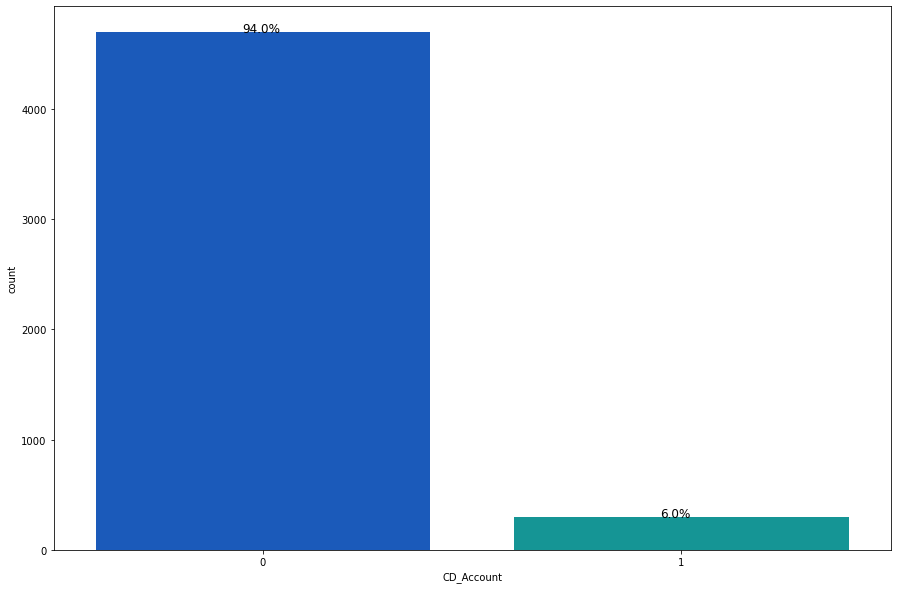

In [53]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["CD_Account"],palette='winter')
perc_on_bar(ax,df["CD_Account"])

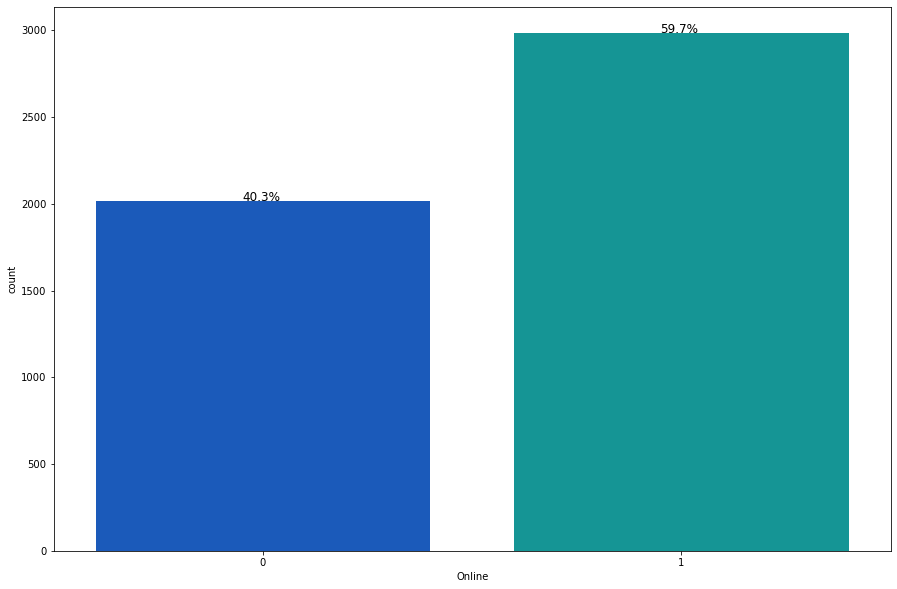

In [54]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Online"],palette='winter')
perc_on_bar(ax,df["Online"])

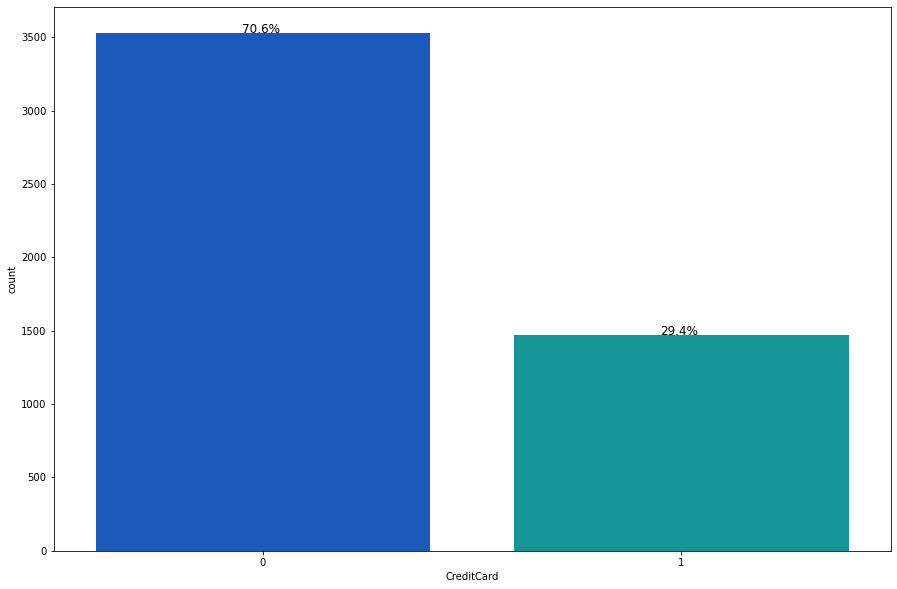

In [55]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["CreditCard"],palette='winter')
perc_on_bar(ax,df["CreditCard"])

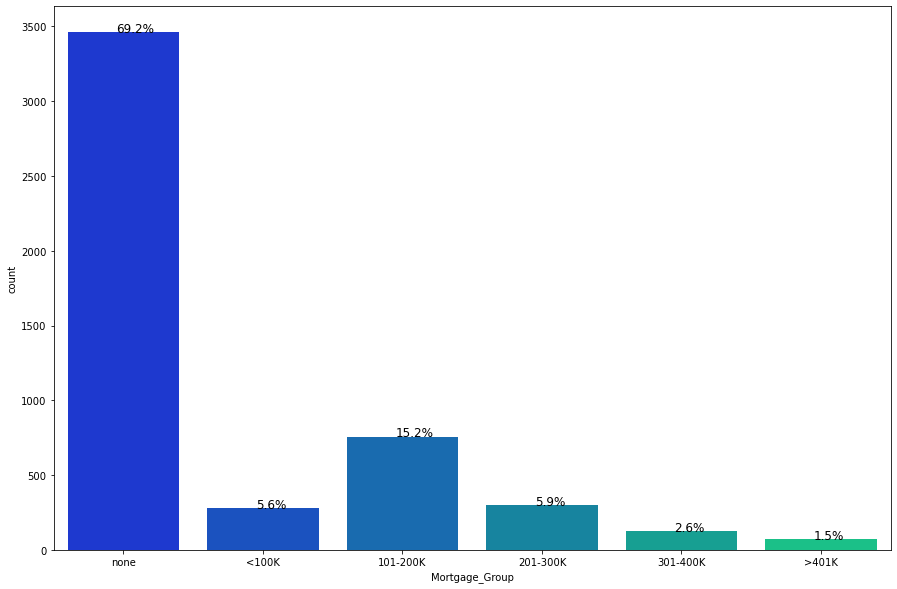

In [56]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Mortgage_Group"],palette='winter')
perc_on_bar(ax,df["Mortgage_Group"])

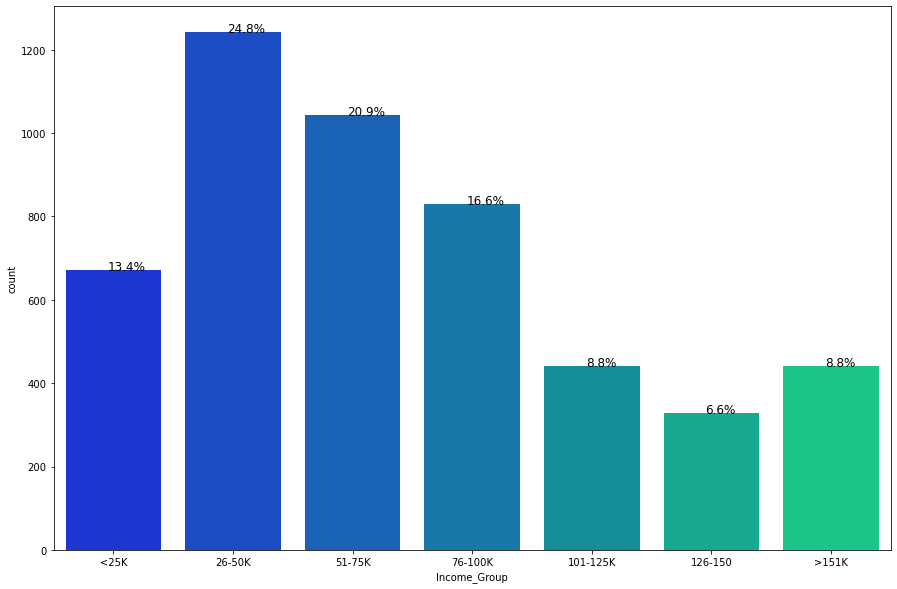

In [57]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Income_Group"],palette='winter')
perc_on_bar(ax,df["Income_Group"])

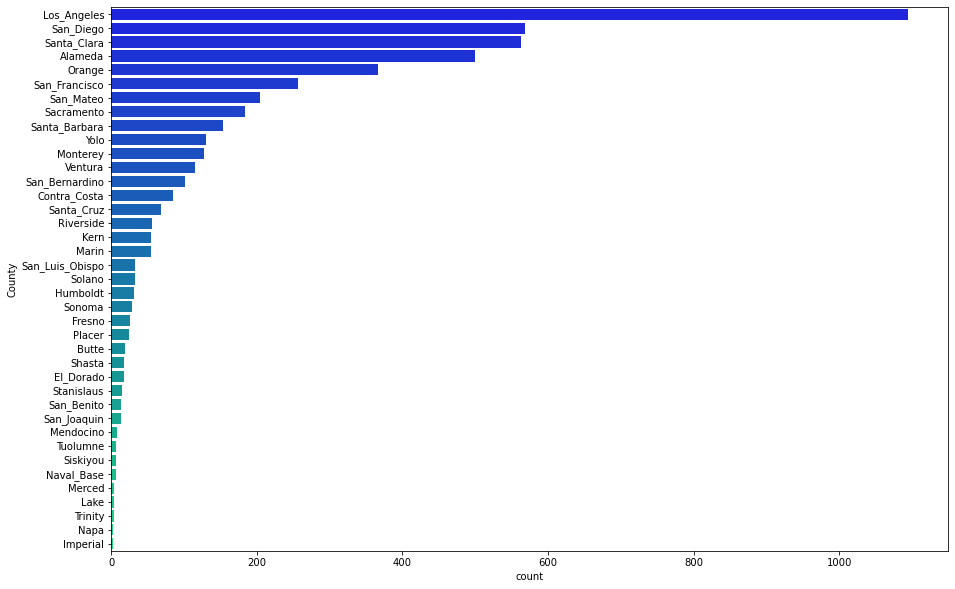

In [58]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y="County", data=df, order=df['County'].value_counts().index, palette='winter')


## Bivariate and Multivariate Analysis

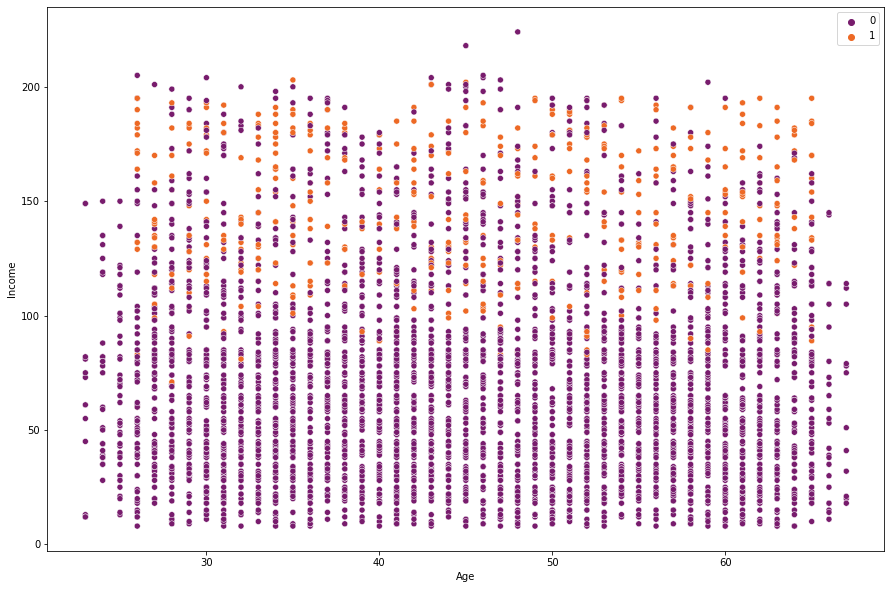

In [59]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Age"],df["Income"],hue=df["Personal_Loan"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

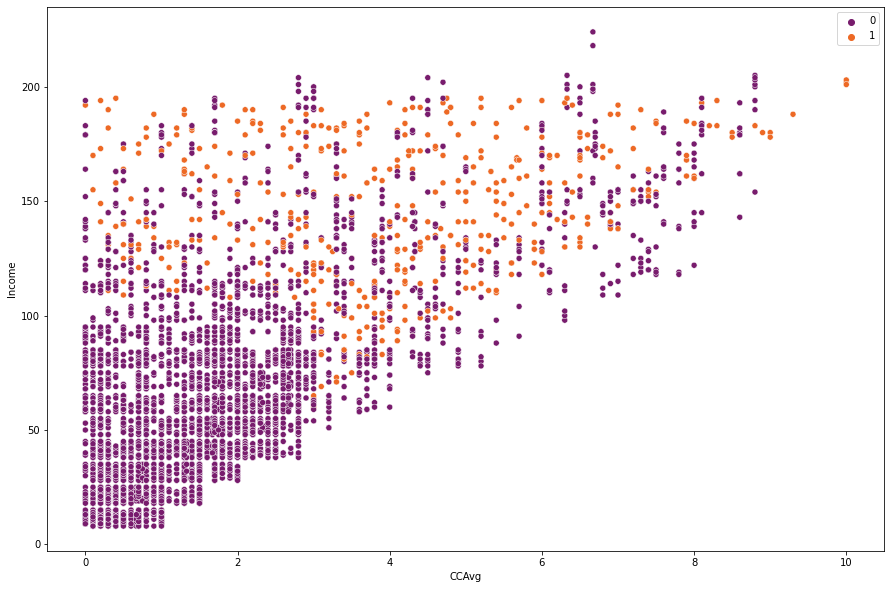

In [60]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["CCAvg"],df["Income"],hue=df["Personal_Loan"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

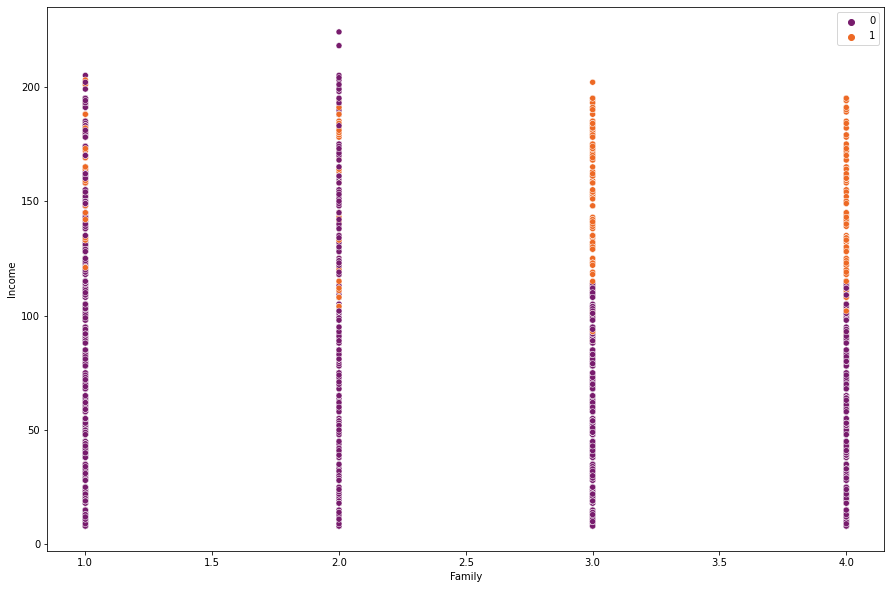

In [61]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Family"],df["Income"],hue=df["Personal_Loan"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

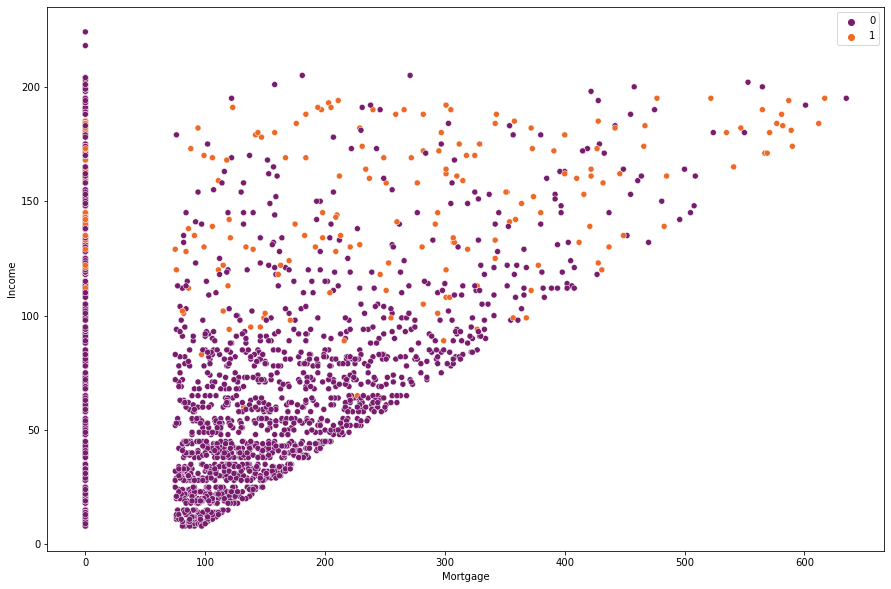

In [62]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Mortgage"],df["Income"],hue=df["Personal_Loan"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

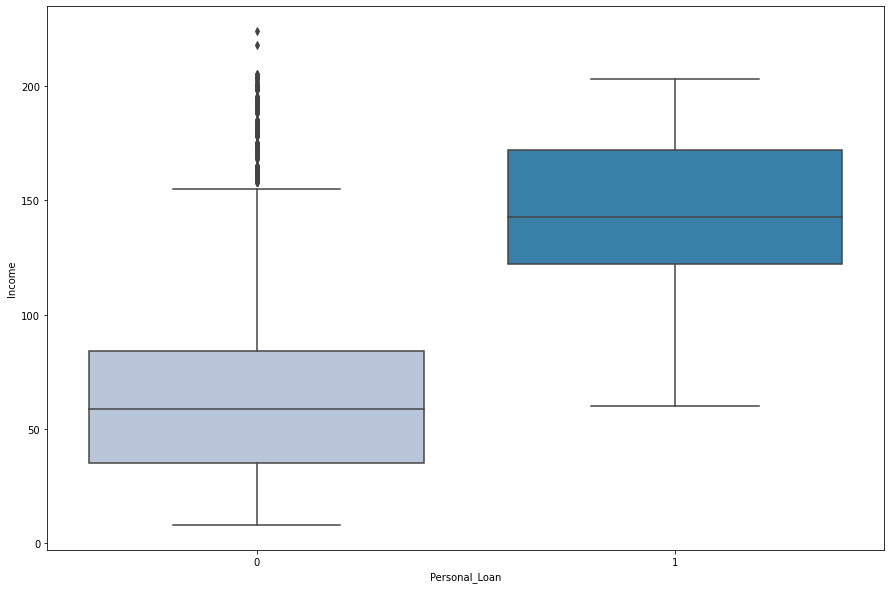

In [63]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Personal_Loan"],df["Income"],palette="PuBu")
plt.show()

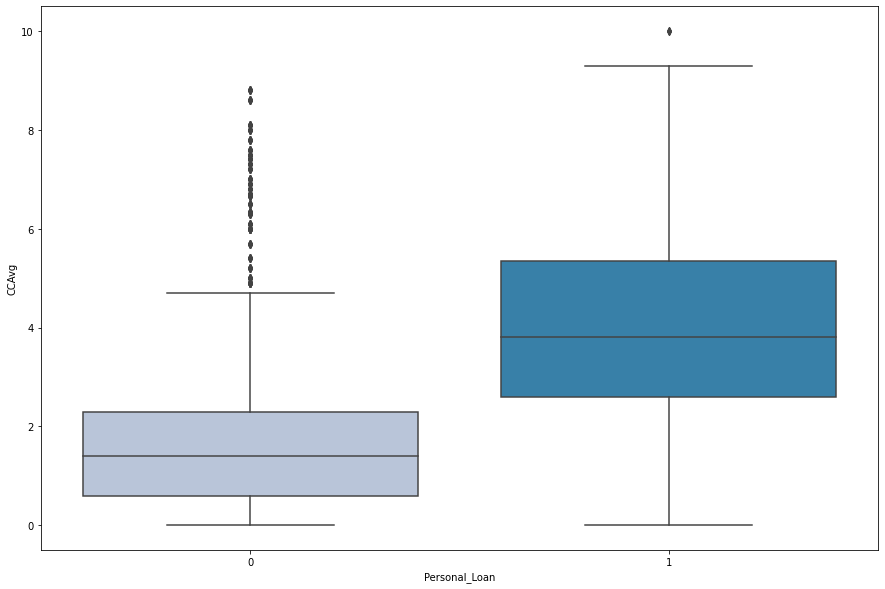

In [64]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Personal_Loan"],df["CCAvg"],palette="PuBu")
plt.show()

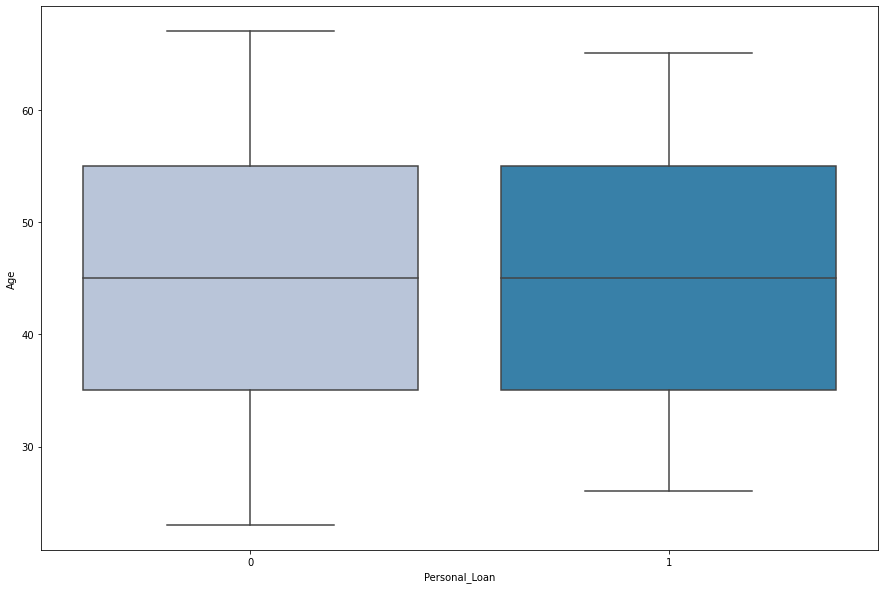

In [65]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Personal_Loan"],df["Age"],palette="PuBu")
plt.show()

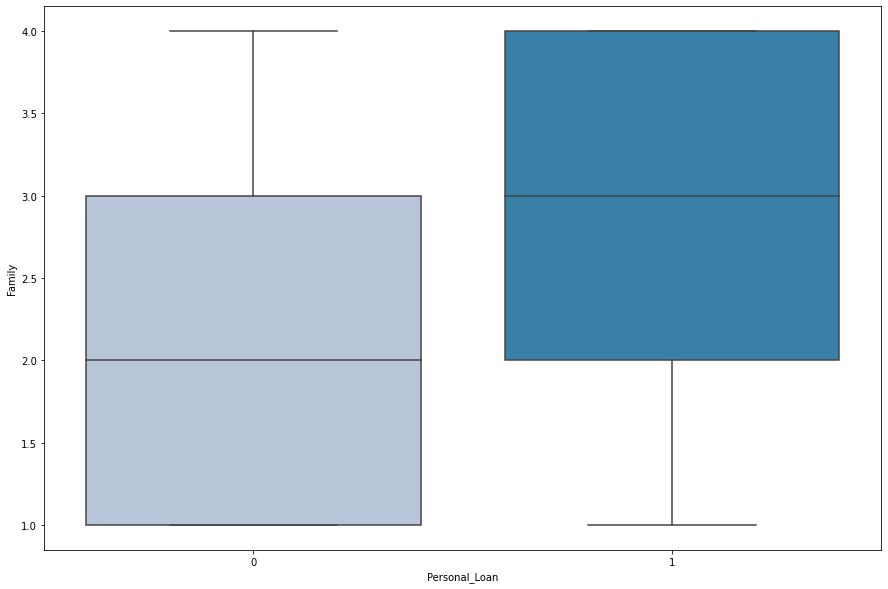

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Personal_Loan"],df["Family"],palette="PuBu")
plt.show()

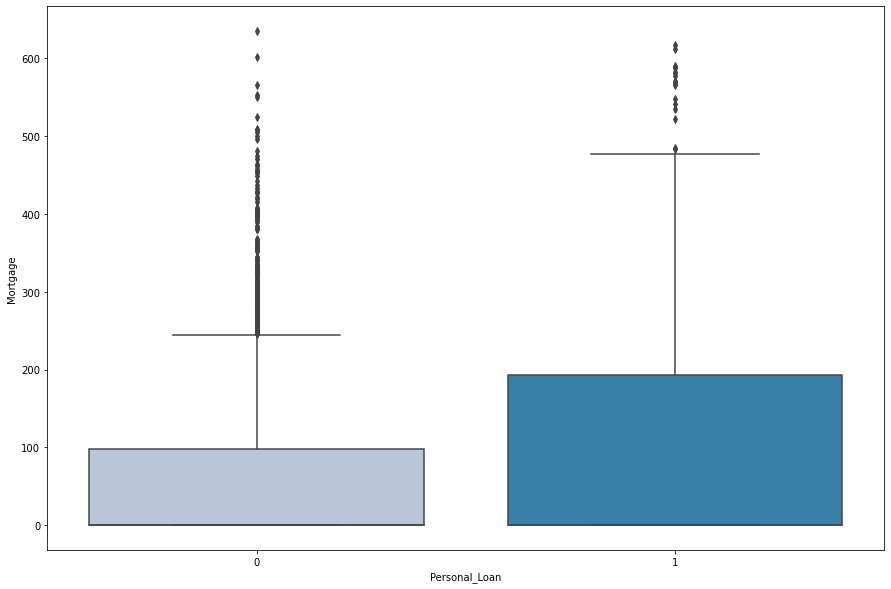

In [67]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Personal_Loan"],df["Mortgage"],palette="PuBu")
plt.show()

In [68]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index').sort_values(by=0,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


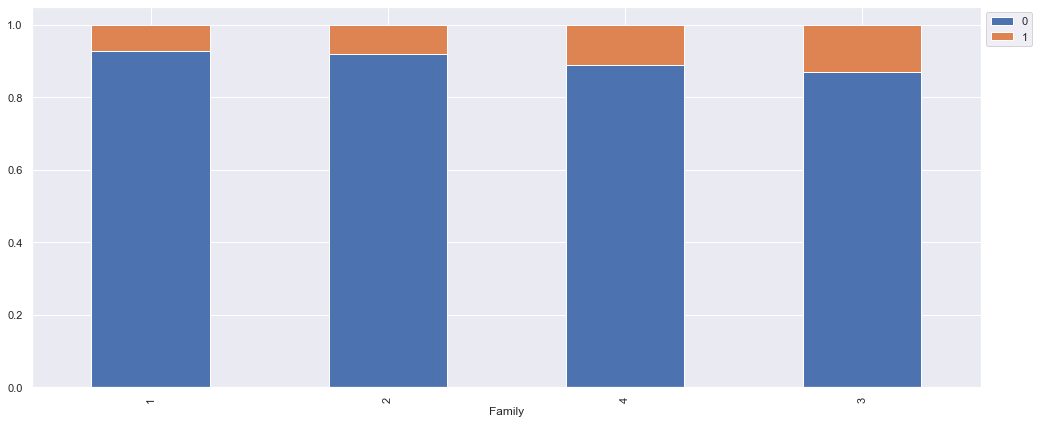

In [69]:
stacked_plot(df['Family'])

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


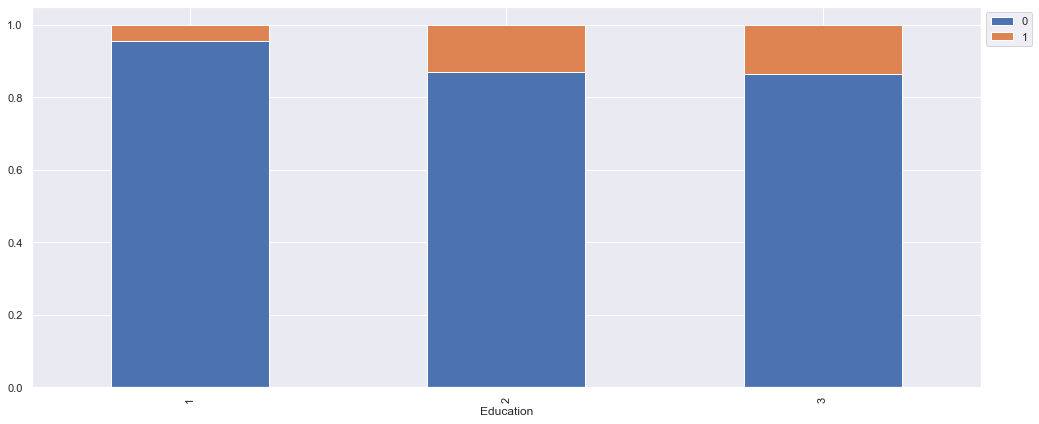

In [70]:
stacked_plot(df['Education'])

Personal_Loan     0    1   All
CCAvg_Group                   
All            4520  480  5000
3<4K            215  104   319
>6K             183   84   267
4<5K            138   81   219
5<6K             34   63    97
2<3K            983   56  1039
<1K            1636   47  1683
1<2K           1331   45  1376
------------------------------------------------------------------------------------------------------------------------


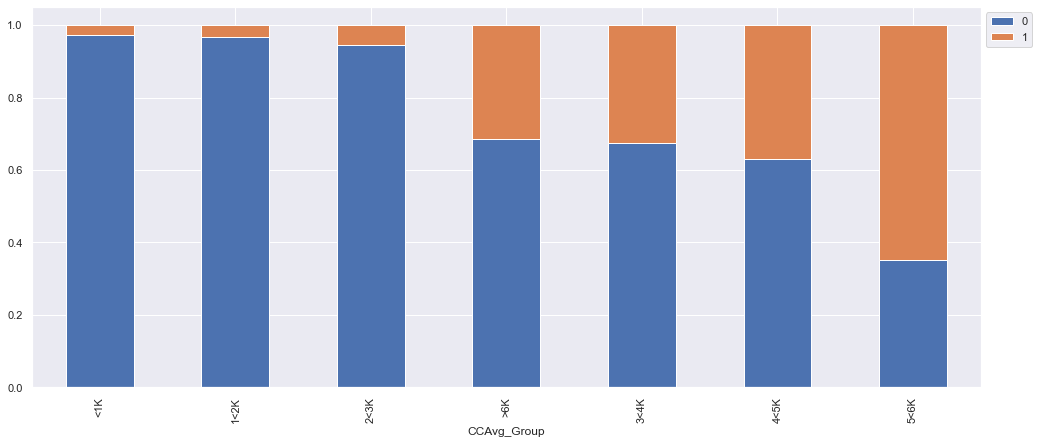

In [71]:
stacked_plot(df['CCAvg_Group'])

Personal_Loan      0    1   All
Mortgage_Group                 
All             4520  480  5000
none            3150  312  3462
201-300K         257   40   297
301-400K          88   40   128
101-200K         719   39   758
>401K             37   36    73
<100K            269   13   282
------------------------------------------------------------------------------------------------------------------------


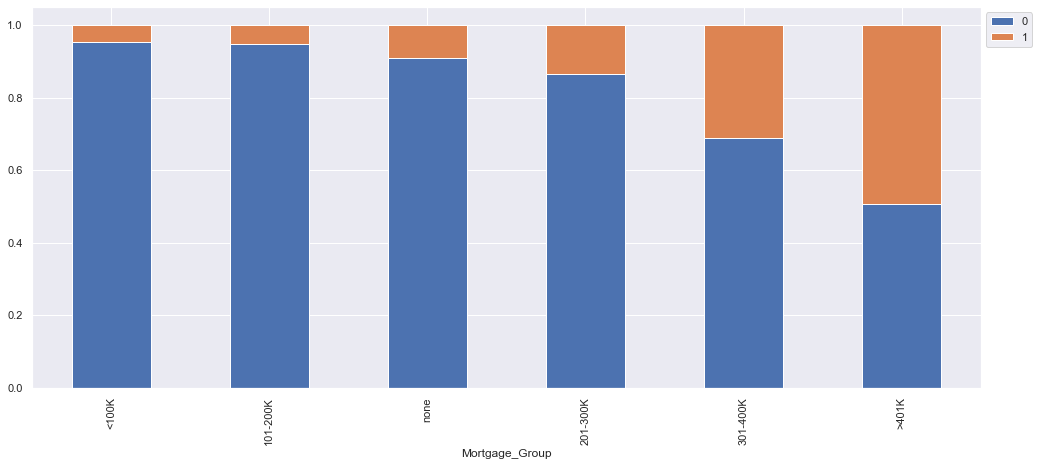

In [72]:
stacked_plot(df['Mortgage_Group'])

Personal_Loan     0    1   All
Income_Group                  
All            4520  480  5000
>151K           224  218   442
126-150         211  118   329
101-125K        339  102   441
76-100K         795   35   830
51-75K         1037    7  1044
<25K            672    0   672
26-50K         1242    0  1242
------------------------------------------------------------------------------------------------------------------------


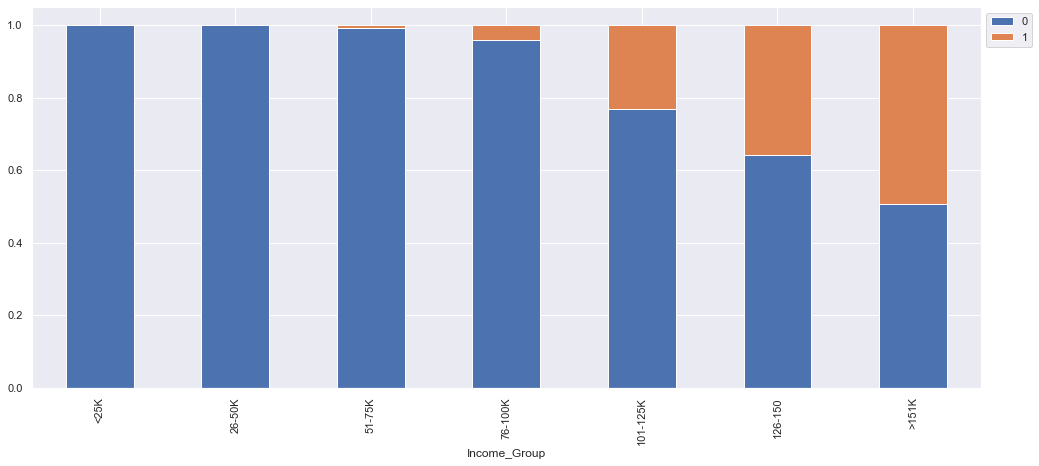

In [73]:
stacked_plot(df['Income_Group'])

In [74]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'City', 'County', 'Income_Group',
       'CCAvg_Group', 'Mortgage_Group'],
      dtype='object')

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


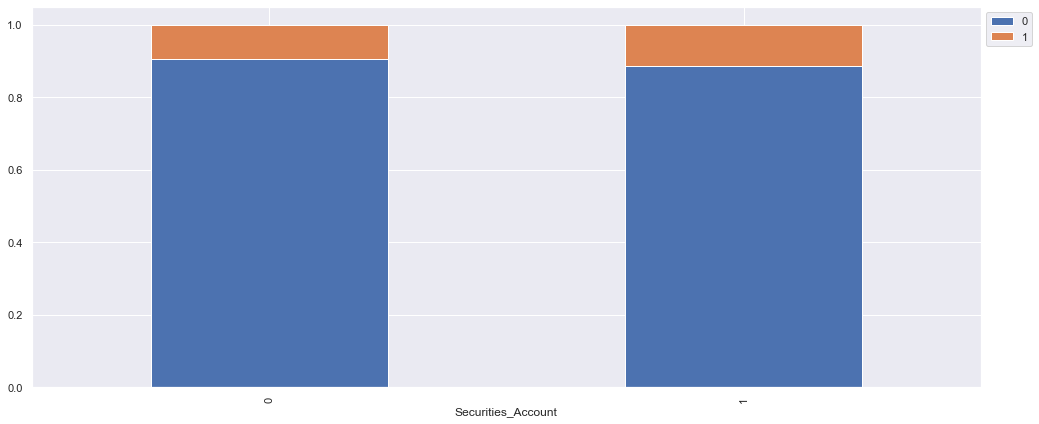

In [75]:
stacked_plot(df['Securities_Account'])

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


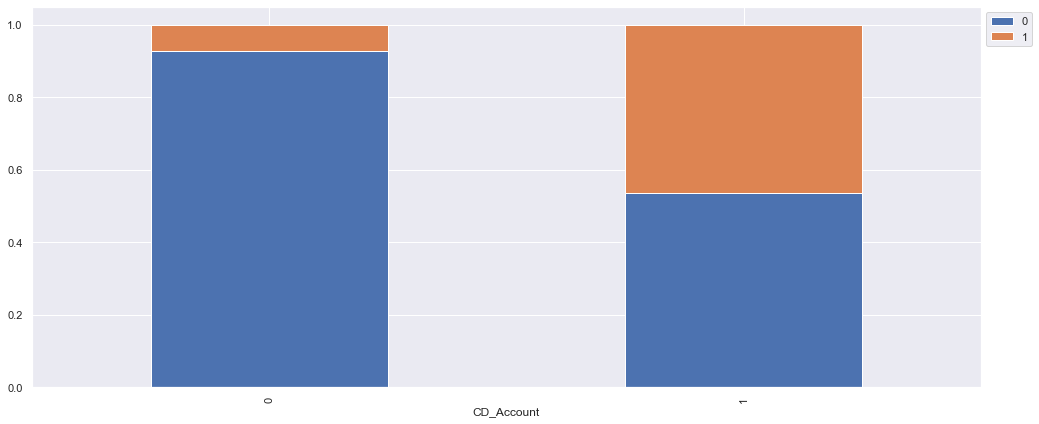

In [76]:
stacked_plot(df['CD_Account'])

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


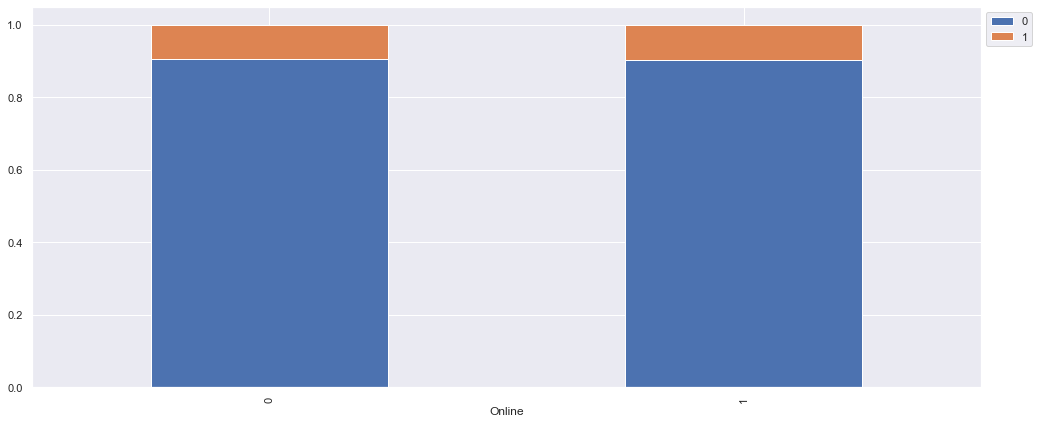

In [77]:
stacked_plot(df['Online'])

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


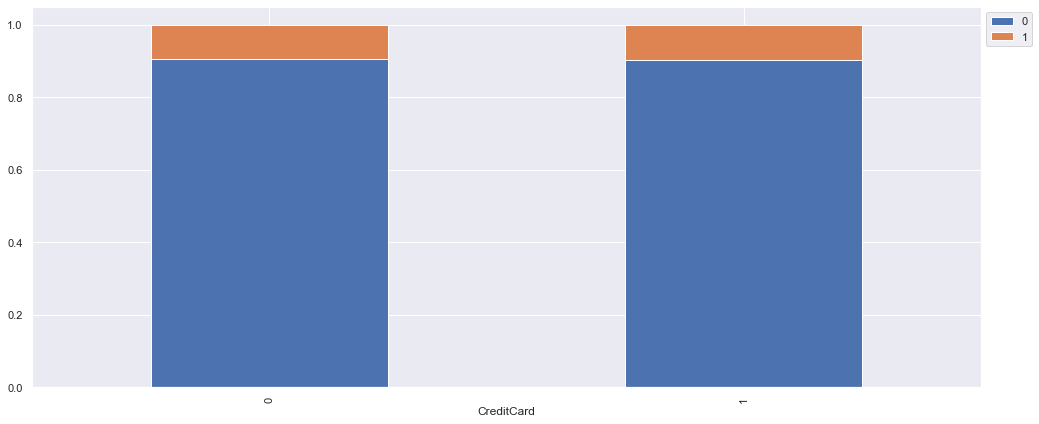

In [78]:
stacked_plot(df['CreditCard'])

Personal_Loan       0    1   All
County                          
All              4520  480  5000
Los_Angeles       984  111  1095
Santa_Clara       492   71   563
San_Diego         509   59   568
Alameda           456   44   500
Orange            333   33   366
San_Francisco     238   19   257
Monterey          113   15   128
Sacramento        169   15   184
San_Mateo         192   12   204
Contra_Costa       73   12    85
Santa_Barbara     143   11   154
Ventura           104   11   115
Yolo              122    8   130
Santa_Cruz         60    8    68
Kern               47    7    54
Sonoma             22    6    28
Marin              48    6    54
Riverside          50    6    56
San_Luis_Obispo    28    5    33
Solano             30    3    33
San_Bernardino     98    3   101
Shasta             15    3    18
Placer             22    2    24
Fresno             24    2    26
Butte              17    2    19
Humboldt           30    2    32
Stanislaus         14    1    15
El_Dorado 

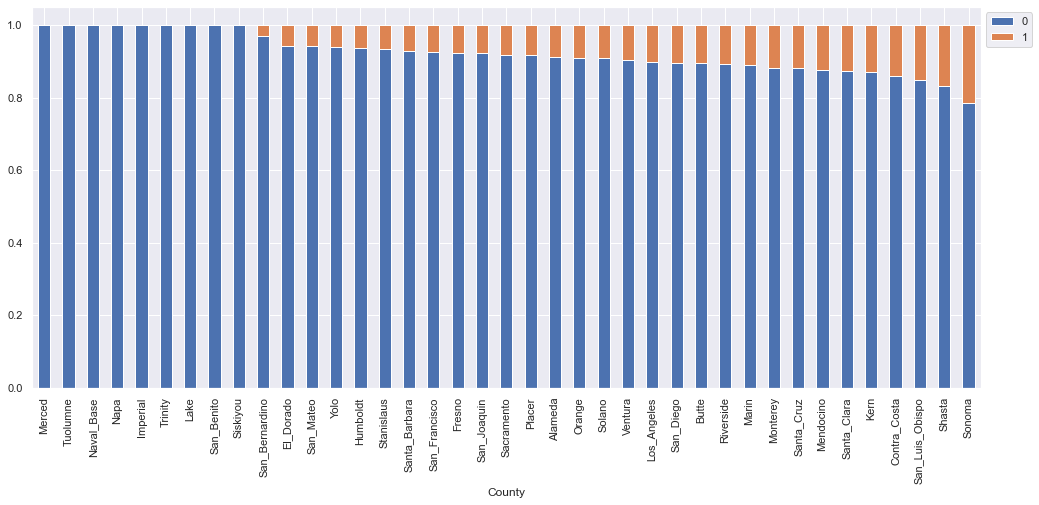

In [79]:
stacked_plot(df['County'])

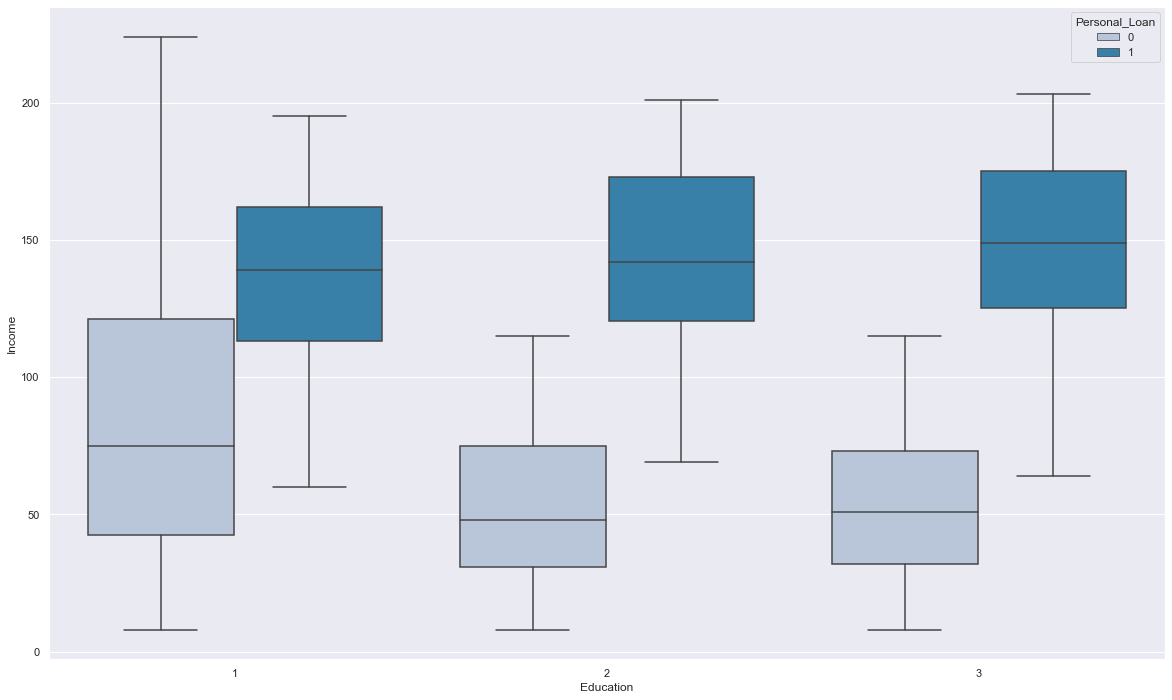

In [80]:
plt.figure(figsize=(20,12))
sns.boxplot(y="Income", x="Education", data=data,hue='Personal_Loan',showfliers=False, palette="PuBu");

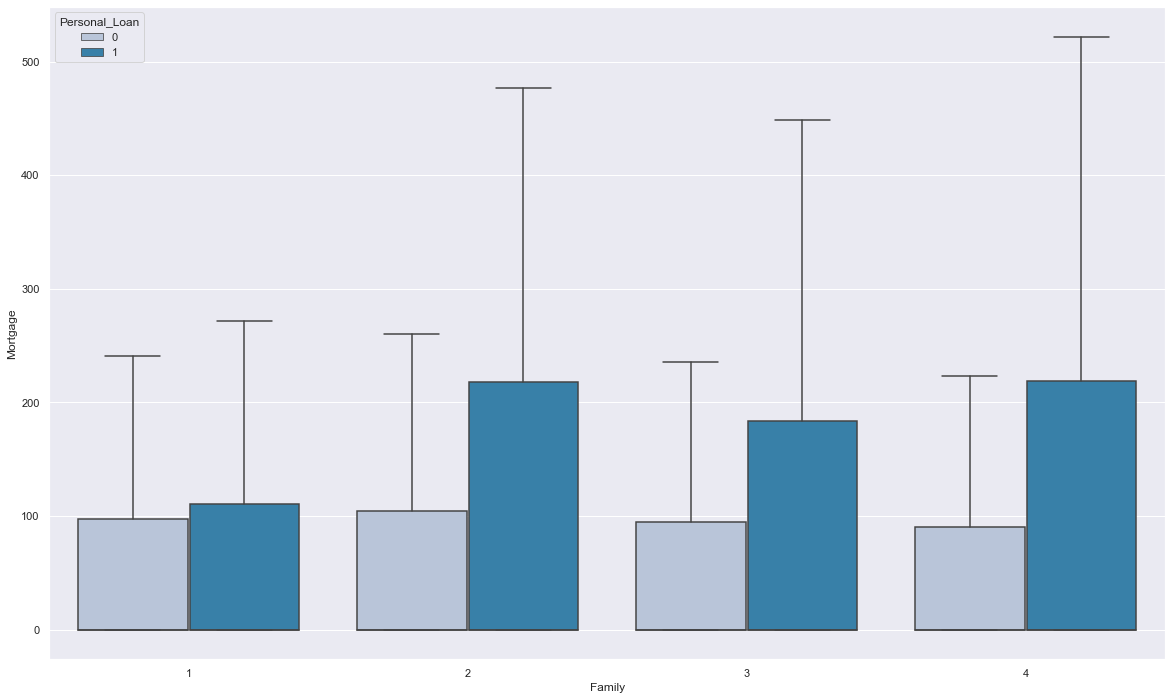

In [81]:
plt.figure(figsize=(20,12))
sns.boxplot(y="Mortgage", x="Family", data=data,hue='Personal_Loan',showfliers=False, palette="PuBu");

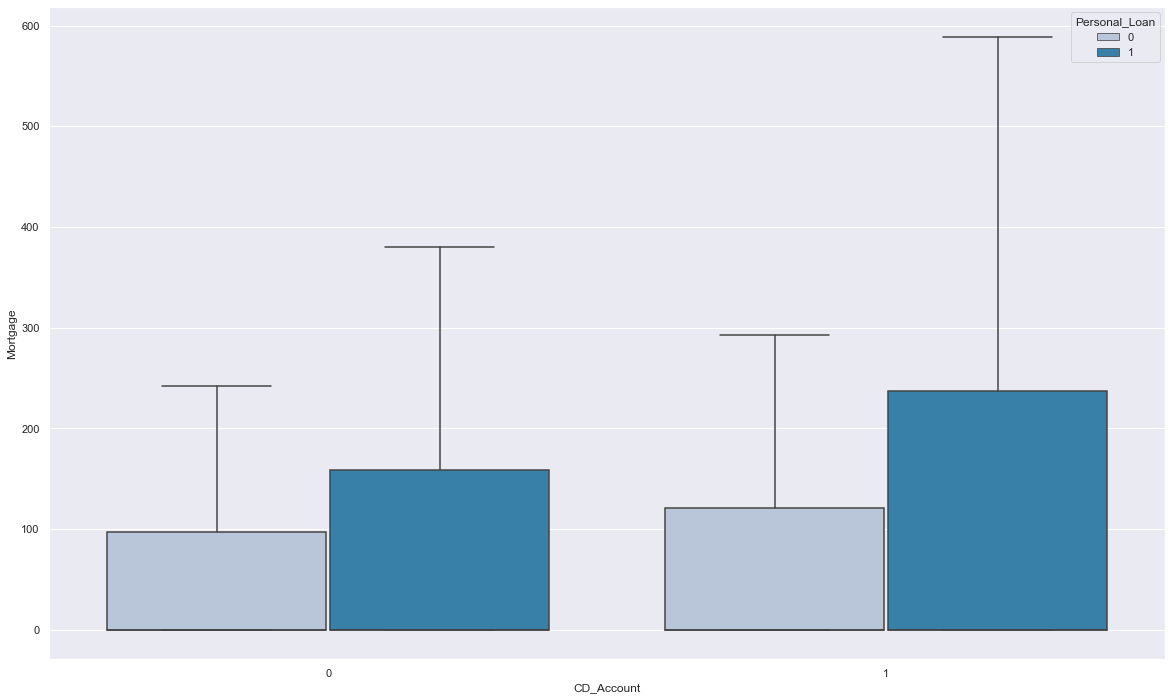

In [82]:
plt.figure(figsize=(20,12))
sns.boxplot(y="Mortgage", x="CD_Account", data=data,hue='Personal_Loan',showfliers=False, palette="PuBu");

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  City                5000 non-null   category
 15  County              5000 non-null   ca

### EDA Observations


Multivariate Analysis
- Age and Experience are perfectyly correlated. I will drop Experience during analysis
- Income and CCAvg have a 0.6 correlation. Income and CCAvg are correlated with Personal Loan at 0.5 and 0.4 respectively
- Just 9.6% of current customers have a Personal Loan this means that our model starts with a base Accuracy of 90.4% assuming we put all customers in the "No" or "0" bucket.
- 10.4% ave Securties Account
- 6.0% have a CD Account
- 59.7% access the bank via the internet
- 29.4% of customers have a Credit Card issued from another bank
- 69.2% do not have a morgage, ~21% have a motgage less than \\$200K while ~9% have a mortgage greater than \$200K
- The largest number of customer reside in Los Angeles County followed by San Diego, Santa Clara and Alameda.
- All customers in this dataset are form California

Bivariate and Multivariate Analysis
- Age does not seem to have any impact on whether or not a customer takes out a Personal Loan but Income is a strong driver
- Customers with incomes less than \\$100K are more likey to take out a loan than customer with lower incomes
- CCAvg balance also seems to be a strong indicator and is correlated with Income. Customers with balances less than \\$3K take out the least loans while customers who carry balances greater than \$3K are more likely to take out a loan
- Customers with larger families greater than 3 members also tend to take out more loans
- Customers with Mortages greater than greater than \\$200K are more likey to take out a loan with mortgages greater than $400K being the most likey
- More educated customers tend to take out more loans
- Customers with Securties Account, CreditCard, and Online banking are just as likely to have a loan or not however, customers with CD Accounts are much more likely to have more personal loans.
- Customers from Northern CA are more likey to take out a loan than those in Southern CA



## Data Preprocessing

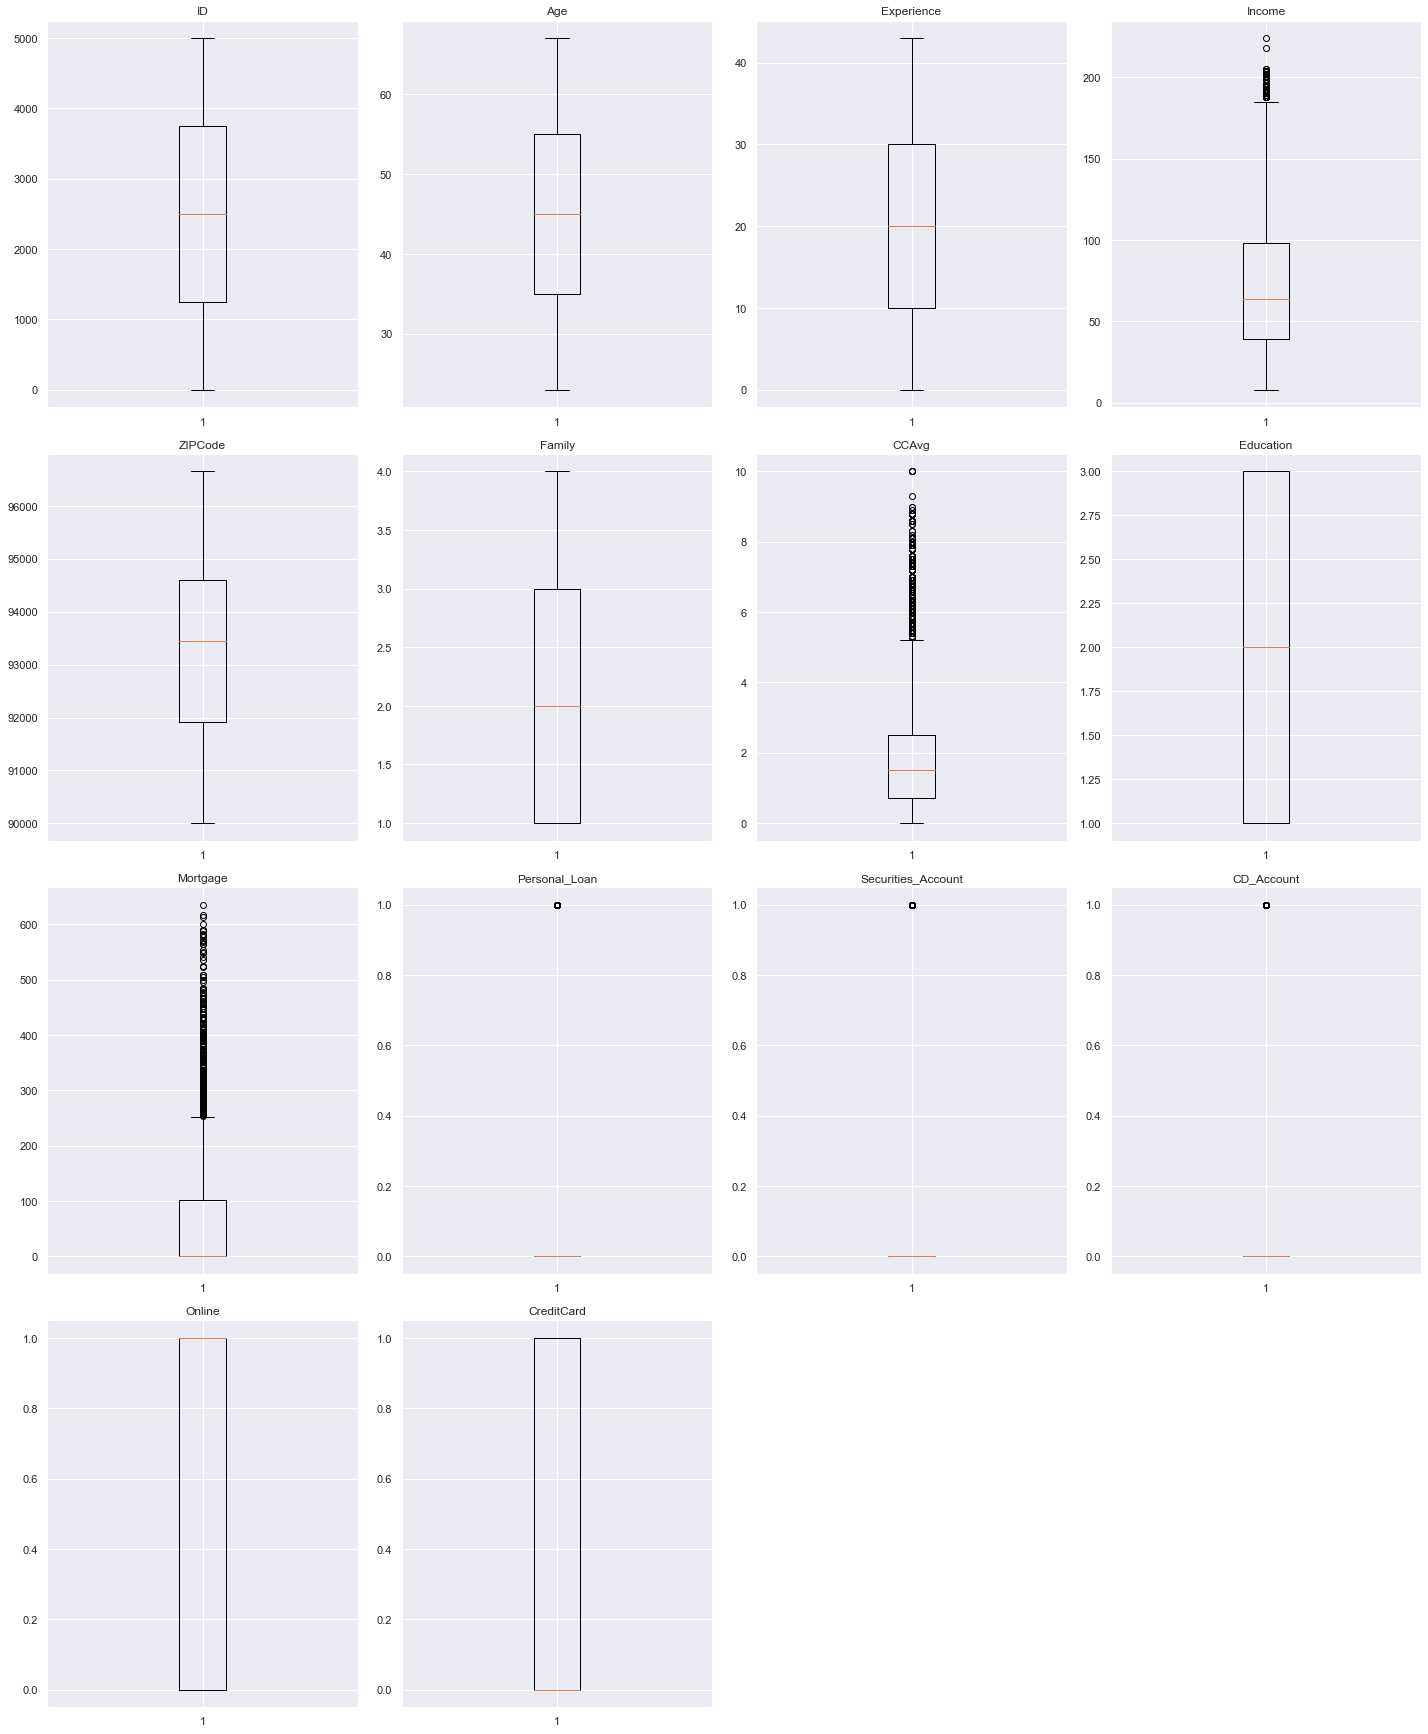

In [84]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* ID will be dropped before running model
* Experience will be dropped due to perfect correlation with Age
* Income, CCAvg, and Mortgage have outliers in the upper range but will not be trimmed because amounts do not seem to be one off events but a fair representation of market variance that is likely to reoccur. These will be dropped in favor of categorical groupings that have been made.
* Models will be run for non-trimmed numerical columns, trimmed, and categorical grouping


### Drop columns: Experience, ID, Income, CCAvg, Mortgage, City, and ZipCode (too many in favor of County)


In [85]:
# drop Experience, ID, Income, CCAvg, Mortgage, City, and ZipCode (too many in favor of county)

df.drop(['ID'],axis=1,inplace=True)
df.drop(['Experience'],axis=1,inplace=True)
df.drop(['Income'],axis=1,inplace=True)
df.drop(['CCAvg'],axis=1,inplace=True) # high correlation causing singular matrix errors in model
df.drop(['Mortgage'],axis=1,inplace=True)
df.drop(['ZIPCode'],axis=1,inplace=True)
df.drop(['City'],axis=1,inplace=True)
df.drop(['CCAvg_Group'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Family              5000 non-null   int64   
 2   Education           5000 non-null   int64   
 3   Personal_Loan       5000 non-null   int64   
 4   Securities_Account  5000 non-null   int64   
 5   CD_Account          5000 non-null   int64   
 6   Online              5000 non-null   int64   
 7   CreditCard          5000 non-null   int64   
 8   County              5000 non-null   category
 9   Income_Group        5000 non-null   category
 10  Mortgage_Group      5000 non-null   category
dtypes: category(3), int64(8)
memory usage: 329.4 KB


In [86]:
df.corr()

Age    Family  Education  Personal_Loan  \
Age                 1.000000 -0.046418   0.041334      -0.007726   
Family             -0.046418  1.000000   0.064929       0.061367   
Education           0.041334  0.064929   1.000000       0.136722   
Personal_Loan      -0.007726  0.061367   0.136722       1.000000   
Securities_Account -0.000436  0.019994  -0.010812       0.021954   
CD_Account          0.008043  0.014110   0.013934       0.316355   
Online              0.013702  0.010354  -0.015004       0.006278   
CreditCard          0.007681  0.011588  -0.011014       0.002802   

                    Securities_Account  CD_Account    Online  CreditCard  
Age                          -0.000436    0.008043  0.013702    0.007681  
Family                        0.019994    0.014110  0.010354    0.011588  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Personal_Loan                 0.021954    0.316355  0.006278    0.002802  
Securities_Account            1.000000    0.317034  0.012627   -0.015028  
CD_Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

### Creating a function to split, encode and add a constant to X
* The function will save us some time while checking high VIF values as we have to iteratively drop variables and check model performance.

In [87]:
def split(*kwargs):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = df.drop([*kwargs], axis=1)
    Y = df['Personal_Loan']

    X = pd.get_dummies(X,drop_first=True)
    X = add_constant(X)

    #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [88]:
X_train,X_test, y_train, y_test = split('Personal_Loan')

# Logistic Regression

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person has a Personal Loan but actually does not.
2. Predicting a person doesn't have a Personal Loan but actually they do.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person has a Personal Loan but actually does not then we will not adjust our business practices correctly to create policies to maximize the number of customers who take out a Personal Loan


* If we predict a person doesn't have a Personal Loan but they do then we will fail to understand which customers are more likey to take out a Personal Loan and market our services to the wrong group.

### How to reduce losses?
* We can use accuracy since the downside of a False Positive is minimized. We are only attempting to predict whether or not a customer will apply for a loan not whether ot not they will default. For this application, we want to identify all customers likey to apply for a loan and can evaluate their application for approval at a later step in the process. 


*  In Logistic regression`f1_score` should also be maximized, the greater the f1_score higher maximizes both Accuracy and Recall. Recall can help us be more efficient with our marketing by reducing the number of customers we market to who are less likey to apply for a loan. A good balance of both Accuracy and Recall are good metrics for this project. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_metrics_score1 function will be used to check the model performance of models built using the statsmodels library.
* The get_metrics_score2 function will be used to check the model performance of models built using the Sklearn library.

In [89]:
# borrowing functions to score our model

def get_metrics_score1(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [90]:
# borrowing functions to score our model


def get_metrics_score2(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

### Logistic Regression (with Sklearn library)

In [91]:
# run model using categorical grouped variables Income_Group, CCAvg_Group, and Mortgage_Group. 
# Dropped numerical columns Income, CCAvg, and Mortgage


lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score2(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.962
Accuracy on test set :  0.954
Recall on training set :  0.6858006042296072
Recall on test set :  0.610738255033557
Precision on training set :  0.88671875
Precision on test set :  0.8921568627450981
F1 on training set :  0.7734241908006814
F1 on test set :  0.7250996015936254


#### Models were run for non-trimmed numerical columns, trimmed, and categorical grouping. Categorical grouping produced the best results


* Non-Trimmmed numerical column results:
   - Accuracy on training set :  0.9537142857142857
   - Accuracy on test set :  0.9406666666666667
   - Recall on training set :  0.6072507552870091
   - Recall on test set :  0.5100671140939598
   - Precision on training set :  0.8626609442060086
   - Precision on test set :  0.8260869565217391
   - F1 on training set :  0.7127659574468086
   - F1 on test set :  0.6307053941908715


* 1.5xIQR Trimmed numerical column results:
   - Accuracy on training set :  0.956
   - Accuracy on test set :  0.942
   - Recall on training set :  0.6314199395770392
   - Recall on test set :  0.5369127516778524
   - Precision on training set :  0.8672199170124482
   - Precision on test set :  0.8163265306122449
   - F1 on training set :  0.7307692307692307
   - F1 on test set :  0.6477732793522267

    


#### Model with categorical groupings (Income_Group, CCAvg_Group, Income) for numerical variables produced the best `F1 score` on test data

- We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.


- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.


- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [92]:
# quick check for correlation of training data 

corr = X_train.corr()
corr.style.background_gradient(cmap='YlGnBu')

In [93]:
X_train.columns

Index(['const', 'Age', 'Family', 'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County_Butte',
       'County_Contra_Costa', 'County_El_Dorado', 'County_Fresno',
       'County_Humboldt', 'County_Imperial', 'County_Kern', 'County_Lake',
       'County_Los_Angeles', 'County_Marin', 'County_Mendocino',
       'County_Merced', 'County_Monterey', 'County_Napa', 'County_Naval_Base',
       'County_Orange', 'County_Placer', 'County_Riverside',
       'County_Sacramento', 'County_San_Benito', 'County_San_Bernardino',
       'County_San_Diego', 'County_San_Francisco', 'County_San_Joaquin',
       'County_San_Luis_Obispo', 'County_San_Mateo', 'County_Santa_Barbara',
       'County_Santa_Clara', 'County_Santa_Cruz', 'County_Shasta',
       'County_Siskiyou', 'County_Solano', 'County_Sonoma',
       'County_Stanislaus', 'County_Trinity', 'County_Tuolumne',
       'County_Ventura', 'County_Yolo', 'Income_Group_26-50K',
       'Income_Group_51-75K', 'Income_Group_7

###  Logistic Regression (with statsmodels library)

In [94]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test)

         Current function value: 0.104058
         Iterations: 35
Accuracy on training set :  0.9634285714285714
Accuracy on test set :  0.954
Recall on training set :  0.7190332326283988
Recall on test set :  0.6845637583892618
Precision on training set :  0.8717948717948718
Precision on test set :  0.8225806451612904
F1 on training set :  0.7880794701986755
F1 on test set :  0.7472527472527473


* There appears to be some overfitting as the model performs better on the training data than it does on the test 

In [95]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3443
Method:                           MLE   Df Model:                           56
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                  0.6675
Time:                        21:20:56   Log-Likelihood:                -364.20
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                5.355e-269
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -30.2391   5439.529     -0.006      0.996   -1.07e+04    1.06e+04
Age                         0.0019      0.008      0.229      0.819      -0.015       0.018
Family                      0.8104      0.102      7.922      0.000       0.610       1.011
Education                   1.8072      0.149     12.116      0.000       1.515       2.100
Securities_Account         -1.3024      0.406     -3.208      0.001      -2.098      -0.507
CD_Account                  4.0372      0.452      8.928      0.000       3.151       4.924
Online                     -0.5262      0.210     -2.506      0.012      -0.938      -0.115
CreditCard                 -1.4330      0.286     -5.002      0.000      -1.995      -0.872
County_Butte              -17.4393   9184.075     -0.002      0.998    -1.8e+04     1.8e+04
County_Contra_Costa         0.8874      0.738      1.203      0.229      -0.559       2.334
County_El_Dorado            0.2569      2.044      0.126      0.900      -3.749       4.263
County_Fresno              -0.6710      2.698     -0.249      0.804      -5.959       4.617
County_Humboldt             0.5562      1.466      0.379      0.704      -2.317       3.430
County_Imperial           -18.5052   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
County_Kern                 1.3879      0.903      1.537      0.124      -0.382       3.158
County_Lake               -14.8163   2.72e+04     -0.001      1.000   -5.33e+04    5.33e+04
County_Los_Angeles          0.1180      0.369      0.319      0.750      -0.606       0.842
County_Marin                0.4375      0.970      0.451      0.652      -1.463       2.338
County_Mendocino            0.0018      2.064      0.001      0.999      -4.044       4.047
County_Merced             -21.2634   7.02e+04     -0.000      1.000   -1.38e+05    1.38e+05
County_Monterey             0.2235      0.632      0.353      0.724      -1.016       1.463
County_Napa                -6.4156   2994.292     -0.002      0.998   -5875.120    5862.289
County_Naval_Base           2.1225   3.16e+04   6.71e-05      1.000    -6.2e+04     6.2e+04
County_Orange               0.1911      0.470      0.407      0.684      -0.729       1.111
County_Placer               1.4609      1.175      1.244      0.214      -0.841       3.763
County_Riverside            1.7085      0.893      1.913      0.056      -0.042       3.459
County_Sacramento           0.5144      0.565      0.910      0.363      -0.593       1.622
County_San_Benito          -8.0039    180.929     -0.044      0.965    -362.619     346.611
County_San_Bernardino      -1.7194      1.387     -1.240      0.215      -4.437       0.998
County_San_Diego            0.2610      0.421      0.620      0.535      -0.565       1.087
County_San_Francisco        0.2005      0.535      0.375      0.708      -0.848       1.249
County_San_Joaquin          1.9100      4.797      0.398      0.690      -7.491      11.311
County_San_Luis_Obisp

#### There appears to be "quasi-separation". I will check for Multicollinearity using Variance Inflation Factor(VIF) to see if we can improve the model

### MultiCollinearity

In [96]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()

In [97]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                      47.927506
Age                         1.023322
Family                      1.060191
Education                   1.064739
Securities_Account          1.158308
CD_Account                  1.380339
Online                      1.058510
CreditCard                  1.124885
County_Butte                1.036490
County_Contra_Costa         1.141574
County_El_Dorado            1.029900
County_Fresno               1.036543
County_Humboldt             1.063855
County_Imperial             1.009175
County_Kern                 1.096316
County_Lake                 1.013156
County_Los_Angeles          2.431200
County_Marin                1.093123
County_Mendocino            1.026200
County_Merced               1.008741
County_Monterey             1.220790
County_Napa                 1.011908
County_Naval_Base           1.010290
County_Orange               1.607334
County_Placer               1.049938
County_Riverside            1.090000
Cou

- There are no VIF values > 5


### Remove Age, Mortgage_Group, and County_group

In [98]:
X_train3,X_test3,y_train,y_test = split('Personal_Loan')

In [99]:
X_train3.columns

Index(['const', 'Age', 'Family', 'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County_Butte',
       'County_Contra_Costa', 'County_El_Dorado', 'County_Fresno',
       'County_Humboldt', 'County_Imperial', 'County_Kern', 'County_Lake',
       'County_Los_Angeles', 'County_Marin', 'County_Mendocino',
       'County_Merced', 'County_Monterey', 'County_Napa', 'County_Naval_Base',
       'County_Orange', 'County_Placer', 'County_Riverside',
       'County_Sacramento', 'County_San_Benito', 'County_San_Bernardino',
       'County_San_Diego', 'County_San_Francisco', 'County_San_Joaquin',
       'County_San_Luis_Obispo', 'County_San_Mateo', 'County_Santa_Barbara',
       'County_Santa_Clara', 'County_Santa_Cruz', 'County_Shasta',
       'County_Siskiyou', 'County_Solano', 'County_Sonoma',
       'County_Stanislaus', 'County_Trinity', 'County_Tuolumne',
       'County_Ventura', 'County_Yolo', 'Income_Group_26-50K',
       'Income_Group_51-75K', 'Income_Group_7

In [100]:
X_train3.drop(['Age', 'Mortgage_Group_<100K',
       'Mortgage_Group_101-200K', 'Mortgage_Group_201-300K',
       'Mortgage_Group_301-400K', 'Mortgage_Group_>401K', 'County_Butte',
       'County_Contra_Costa', 'County_El_Dorado', 'County_Fresno',
       'County_Humboldt', 'County_Imperial', 'County_Kern', 'County_Lake',
       'County_Los_Angeles', 'County_Marin', 'County_Mendocino',
       'County_Merced', 'County_Monterey', 'County_Napa', 'County_Naval_Base',
       'County_Orange', 'County_Placer', 'County_Riverside',
       'County_Sacramento', 'County_San_Benito', 'County_San_Bernardino',
       'County_San_Diego', 'County_San_Francisco', 'County_San_Joaquin',
       'County_San_Luis_Obispo', 'County_San_Mateo', 'County_Santa_Barbara',
       'County_Santa_Clara', 'County_Santa_Cruz', 'County_Shasta',
       'County_Siskiyou', 'County_Solano', 'County_Sonoma',
       'County_Stanislaus', 'County_Trinity', 'County_Tuolumne',
       'County_Ventura', 'County_Yolo'],axis=1,inplace=True)

X_test3.drop(['Age', 'Mortgage_Group_<100K',
       'Mortgage_Group_101-200K', 'Mortgage_Group_201-300K',
       'Mortgage_Group_301-400K', 'Mortgage_Group_>401K', 'County_Butte',
       'County_Contra_Costa', 'County_El_Dorado', 'County_Fresno',
       'County_Humboldt', 'County_Imperial', 'County_Kern', 'County_Lake',
       'County_Los_Angeles', 'County_Marin', 'County_Mendocino',
       'County_Merced', 'County_Monterey', 'County_Napa', 'County_Naval_Base',
       'County_Orange', 'County_Placer', 'County_Riverside',
       'County_Sacramento', 'County_San_Benito', 'County_San_Bernardino',
       'County_San_Diego', 'County_San_Francisco', 'County_San_Joaquin',
       'County_San_Luis_Obispo', 'County_San_Mateo', 'County_Santa_Barbara',
       'County_Santa_Clara', 'County_Santa_Cruz', 'County_Shasta',
       'County_Siskiyou', 'County_Solano', 'County_Sonoma',
       'County_Stanislaus', 'County_Trinity', 'County_Tuolumne',
       'County_Ventura', 'County_Yolo'],axis=1,inplace=True)

In [101]:
X_train_num4 = X_train3.astype(float).copy()
vif_series5 = pd.Series([variance_inflation_factor(X_train_num4.values,i) for i in range(X_train_num4.shape[1])],index=X_train_num4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

const                    20.232756
Family                    1.043364
Education                 1.057416
Securities_Account        1.146247
CD_Account                1.360307
Online                    1.043379
CreditCard                1.108235
Income_Group_26-50K       2.156887
Income_Group_51-75K       2.063934
Income_Group_76-100K      1.868303
Income_Group_101-125K     1.520833
Income_Group_126-150      1.455623
Income_Group_>151K        1.601407
dtype: float64



In [102]:
X_train3.columns

Index(['const', 'Family', 'Education', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'Income_Group_26-50K', 'Income_Group_51-75K',
       'Income_Group_76-100K', 'Income_Group_101-125K', 'Income_Group_126-150',
       'Income_Group_>151K'],
      dtype='object')

In [103]:
logit4 = sm.Logit(y_train, X_train3.astype(float))
lg4 = logit4.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score1(lg4,X_train3,X_test3,y_train,y_test)

         Current function value: 0.108276
         Iterations: 35
Accuracy on training set :  0.9605714285714285
Accuracy on test set :  0.9566666666666667
Recall on training set :  0.6888217522658611
Recall on test set :  0.6912751677852349
Precision on training set :  0.8669201520912547
Precision on test set :  0.8442622950819673
F1 on training set :  0.7676767676767677
F1 on test set :  0.7601476014760148


* Model F1 score improved to highest so far

In [104]:
lg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                  0.6541
Time:                        21:20:57   Log-Likelihood:                -378.97
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.072e-299
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -31.4202   1.45e+04     -0.002      0.998   -2.85e+04    2.84e+04
Family                    0.7723      0.098      7.864      0.000       0.580       0.965
Education                 1.7758      0.145     12.285      0.000       1.493       2.059
Securities_Account       -1.2856      0.398     -3.230      0.001      -2.066      -0.505
CD_Account                4.0128      0.439      9.151      0.000       3.153       4.872
Online                   -0.5375      0.200     -2.682      0.007      -0.930      -0.145
CreditCard               -1.3424      0.272     -4.928      0.000      -1.876      -0.809
Income_Group_26-50K     -15.1894   2.01e+07  -7.56e-07      1.000   -3.94e+07    3.94e+07
Income_Group_51-75K      19.4302   1.45e+04      0.001      0.999   -2.84e+04    2.85e+04
Income_Group_76-100K     22.2489   1.45e+04      0.002      0.999   -2.84e+04    2.85e+04
Income_Group_101-125K    25.1726   1.45e+04      0.002      0.999   -2.84e+04    2.85e+04
Income_Group_126-150     27.0920   1.45e+04      0.002      0.999   -2.84e+04    2.85e+04
Income_Group_>151K       27.3051   1.45e+04      0.002      0.998   -2.84e+04    2.85e+04
=========================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [105]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                  0.6541
Time:                        21:20:57   Log-Likelihood:                -378.97
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.072e-299
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -31.4202   1.45e+04     -0.002      0.998   -2.85e+04    2.84e+04
Family                    0.7723      0.098      7.864      0.000       0.580       0.965
Educatio

* Model has been greatly simplified
* Income Group has P values higher than 0.05 but removing them drops F1 score by 60% a huge drop (not sure what to do about that)
* F1 scores on train and test data are F1 on training set :  0.767 F1 on test set :  0.760 the best numbers thus far (I have run several doszen model iterations but unfortunately cannot show all the work without the notebook being chaotic and hard to follow)
* This will be our final model
* quasi-separation has not been solved but I don't know how to do that...  perhaps this is a topic is for a future class

###  Metrics of final Model "lg4"

In [106]:
scores_LR = get_metrics_score1(lg4,X_train3,X_test3,y_train,y_test)

Accuracy on training set :  0.9605714285714285
Accuracy on test set :  0.9566666666666667
Recall on training set :  0.6888217522658611
Recall on test set :  0.6912751677852349
Precision on training set :  0.8669201520912547
Precision on test set :  0.8442622950819673
F1 on training set :  0.7676767676767677
F1 on test set :  0.7601476014760148


* ROC-AUC on training set

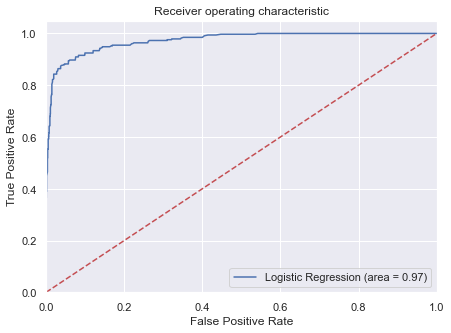

In [107]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

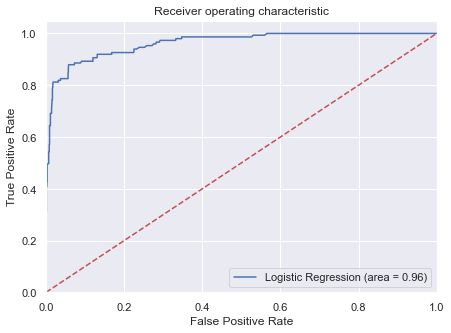

In [108]:
logit_roc_auc_test = roc_auc_score(y_test, lg4.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.

### Coefficient interpretations

- Family and Education are postive indicators for Personal Loans. An increasee in the the size of the family shows a 0.77x increase and Education has a 1.76x increase
- A Securities Account, Online Account, and Credit Card from another bank are negative indicatiors for Persoanl Loans but having a CD Account increase the likehood by 4.01x
- Income seems to be an important indicator with customers with incomes of 26-50K (-15.19x) less likely to take a out a personal loan but increases as incomes rise 51-75K (19.4x), 76-100K (22.2x), 101-125K (25.2x), 126-150K (27.1x), >151K (27.3x).

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**
* Odds from coefficients

In [109]:
odds = np.exp(lg4.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train3.columns, columns=['odds']).T # adding the odds to a dataframe

const    Family  Education  Securities_Account  CD_Account  \
odds  2.261456e-14  2.164711   5.905213            0.276495   55.301618   

        Online  CreditCard  Income_Group_26-50K  Income_Group_51-75K  \
odds  0.584219    0.261217         2.531168e-07         2.744403e+08   

      Income_Group_76-100K  Income_Group_101-125K  Income_Group_126-150  \
odds          4.598011e+09           8.556810e+10          5.833151e+11   

      Income_Group_>151K  
odds        7.218891e+11

In [110]:
perc_change_odds = (np.exp(lg4.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train3.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

const      Family   Education  Securities_Account   CD_Account  \
change_odds% -100.0  116.471067  490.521324          -72.350482  5430.161766   

                 Online  CreditCard  Income_Group_26-50K  Income_Group_51-75K  \
change_odds% -41.578057  -73.878331           -99.999975         2.744403e+10   

              Income_Group_76-100K  Income_Group_101-125K  \
change_odds%          4.598011e+11           8.556810e+12   

              Income_Group_126-150  Income_Group_>151K  
change_odds%          5.833151e+13        7.218891e+13

### Optimal threshold using AUC-ROC curve


In [111]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg4.predict(X_test3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.17844389855622267


In [112]:
scores_LR = get_metrics_score1(lg4,X_train3,X_test3,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.9365714285714286
Accuracy on test set :  0.9353333333333333
Recall on training set :  0.8942598187311178
Recall on test set :  0.8657718120805369
Precision on training set :  0.6128364389233955
Precision on test set :  0.6262135922330098
F1 on training set :  0.7272727272727273
F1 on test set :  0.7267605633802817
ROC-AUC Score on training set :  0.9176253337896676
ROC-AUC Score on test set :  0.9043884967138436


* Precision of Model has decreased

#### Let's use Precision-Recall curve and see if we can find a better threshold


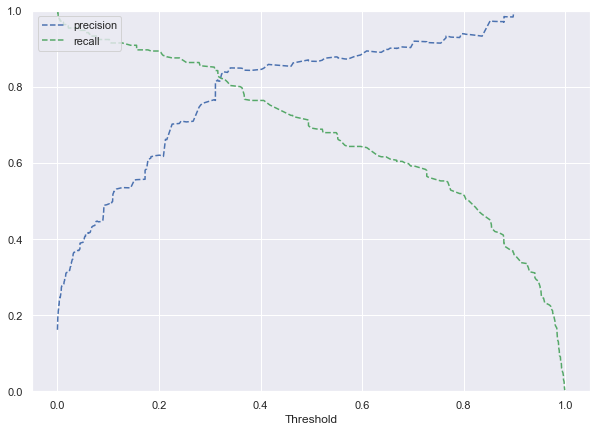

In [113]:
y_scores=lg4.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [114]:
optimal_threshold_curve = 0.31

scores_LR = get_metrics_score1(lg4,X_train3,X_test3,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

Accuracy on training set :  0.9605714285714285
Accuracy on test set :  0.9533333333333334
Recall on training set :  0.8429003021148036
Recall on test set :  0.8120805369127517
Precision on training set :  0.7643835616438356
Precision on test set :  0.7423312883435583
F1 on training set :  0.8017241379310346
F1 on test set :  0.7756410256410257
ROC-AUC Score on training set :  0.907881201862072
ROC-AUC Score on test set :  0.8904962270055987


* changeing the threshold decreased Precison but increase F1 slightly

### Model Performance Summary

In [115]:
# defining list of model
models = [lg4]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train3,X_test3,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [116]:
# defining list of model
models = [lg4]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train3,X_test3,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [117]:
# defining list of model
models = [lg4]

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score1(model,X_train3,X_test3,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [118]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0 .17',
                                          'Logistic Regression - Optimal threshold = 0 .31'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    

comparison_frame

Model  Train_Accuracy  \
0          Logistic Regression Model - Statsmodels        0.960571   
1  Logistic Regression - Optimal threshold = 0 .17        0.936571   
2  Logistic Regression - Optimal threshold = 0 .31        0.960571   

   Test_Accuracy  Train Recall  Test Recall  Train Precision  Test Precision  \
0       0.956667      0.688822     0.691275         0.866920        0.844262   
1       0.935333      0.894260     0.865772         0.612836        0.626214   
2       0.953333      0.842900     0.812081         0.764384        0.742331   

   Train F1   Test F1  
0  0.767677  0.760148  
1  0.727273  0.726761  
2  0.801724  0.775641

### Conclusion

- Accuracy score of 95.3% exceeds the base accuracy of 90.4% indicating the model has some predictive value


- Using the Recall measure, of the customers with a personal loan the model can label them correctly 81.2% of the time. 


- Precision tells us that of all the customers labeled as loan borrowers, 74.2% were actual borrowers


- F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.


- ROC-AUC Score close to 1.0 indicates a good classification model. A score of 0.89 is a good score.


### Recommendations

- Family and Education are postive indicators for Personal Loans. An increasee in the the size of the family shows a 0.77x increase and Education has a 1.76x increase
- A Securities Account, Online Account, and Credit Card from another bank are negative indicatiors for Persoanl Loans but having a CD Account increase the likehood by 4.01x
- Income seems to be an important indicator with customers with incomes of 26-50K (-15.19x) less likely to take a out a personal loan but increases as incomes rise 51-75K (19.4x), 76-100K (22.2x), 101-125K (25.2x), 126-150K (27.1x), >151K (27.3x).

#### All Life should target their marketing efforts for Personal Loans to customers with large families, higher education incomes above //$50,0000 per year. Customers with securites accounts, credit cards from other banks and who bank online are less likely to take out a personal loan.

# Build Decision Tree Model


In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [120]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [121]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.9997142857142857
Accuracy on test set :  0.9646666666666667


- Base accuracy is 90.4% so recall may be a better metric however, the model does exceed the base

In [122]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [123]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

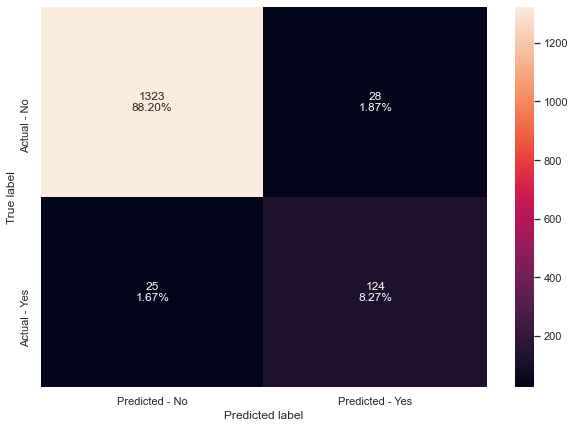

In [124]:
make_confusion_matrix(dTree,y_test)

In [125]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

# Recall on train and test
get_recall_score(dTree)

Accuracy on training set :  0.9997142857142857
Accuracy on test set :  0.9646666666666667
Recall on training set :  0.9969788519637462
Recall on test set :  0.8322147651006712


In [126]:
X_train.columns

Index(['const', 'Age', 'Family', 'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County_Butte',
       'County_Contra_Costa', 'County_El_Dorado', 'County_Fresno',
       'County_Humboldt', 'County_Imperial', 'County_Kern', 'County_Lake',
       'County_Los_Angeles', 'County_Marin', 'County_Mendocino',
       'County_Merced', 'County_Monterey', 'County_Napa', 'County_Naval_Base',
       'County_Orange', 'County_Placer', 'County_Riverside',
       'County_Sacramento', 'County_San_Benito', 'County_San_Bernardino',
       'County_San_Diego', 'County_San_Francisco', 'County_San_Joaquin',
       'County_San_Luis_Obispo', 'County_San_Mateo', 'County_Santa_Barbara',
       'County_Santa_Clara', 'County_Santa_Cruz', 'County_Shasta',
       'County_Siskiyou', 'County_Solano', 'County_Sonoma',
       'County_Stanislaus', 'County_Trinity', 'County_Tuolumne',
       'County_Ventura', 'County_Yolo', 'Income_Group_26-50K',
       'Income_Group_51-75K', 'Income_Group_7

In [127]:
A = X_train
feature_names = list(A.columns)
print(feature_names)


['const', 'Age', 'Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Butte', 'County_Contra_Costa', 'County_El_Dorado', 'County_Fresno', 'County_Humboldt', 'County_Imperial', 'County_Kern', 'County_Lake', 'County_Los_Angeles', 'County_Marin', 'County_Mendocino', 'County_Merced', 'County_Monterey', 'County_Napa', 'County_Naval_Base', 'County_Orange', 'County_Placer', 'County_Riverside', 'County_Sacramento', 'County_San_Benito', 'County_San_Bernardino', 'County_San_Diego', 'County_San_Francisco', 'County_San_Joaquin', 'County_San_Luis_Obispo', 'County_San_Mateo', 'County_Santa_Barbara', 'County_Santa_Clara', 'County_Santa_Cruz', 'County_Shasta', 'County_Siskiyou', 'County_Solano', 'County_Sonoma', 'County_Stanislaus', 'County_Trinity', 'County_Tuolumne', 'County_Ventura', 'County_Yolo', 'Income_Group_26-50K', 'Income_Group_51-75K', 'Income_Group_76-100K', 'Income_Group_101-125K', 'Income_Group_126-150', 'Income_Group_>151K', 'Mortgage_Group_<100K', 

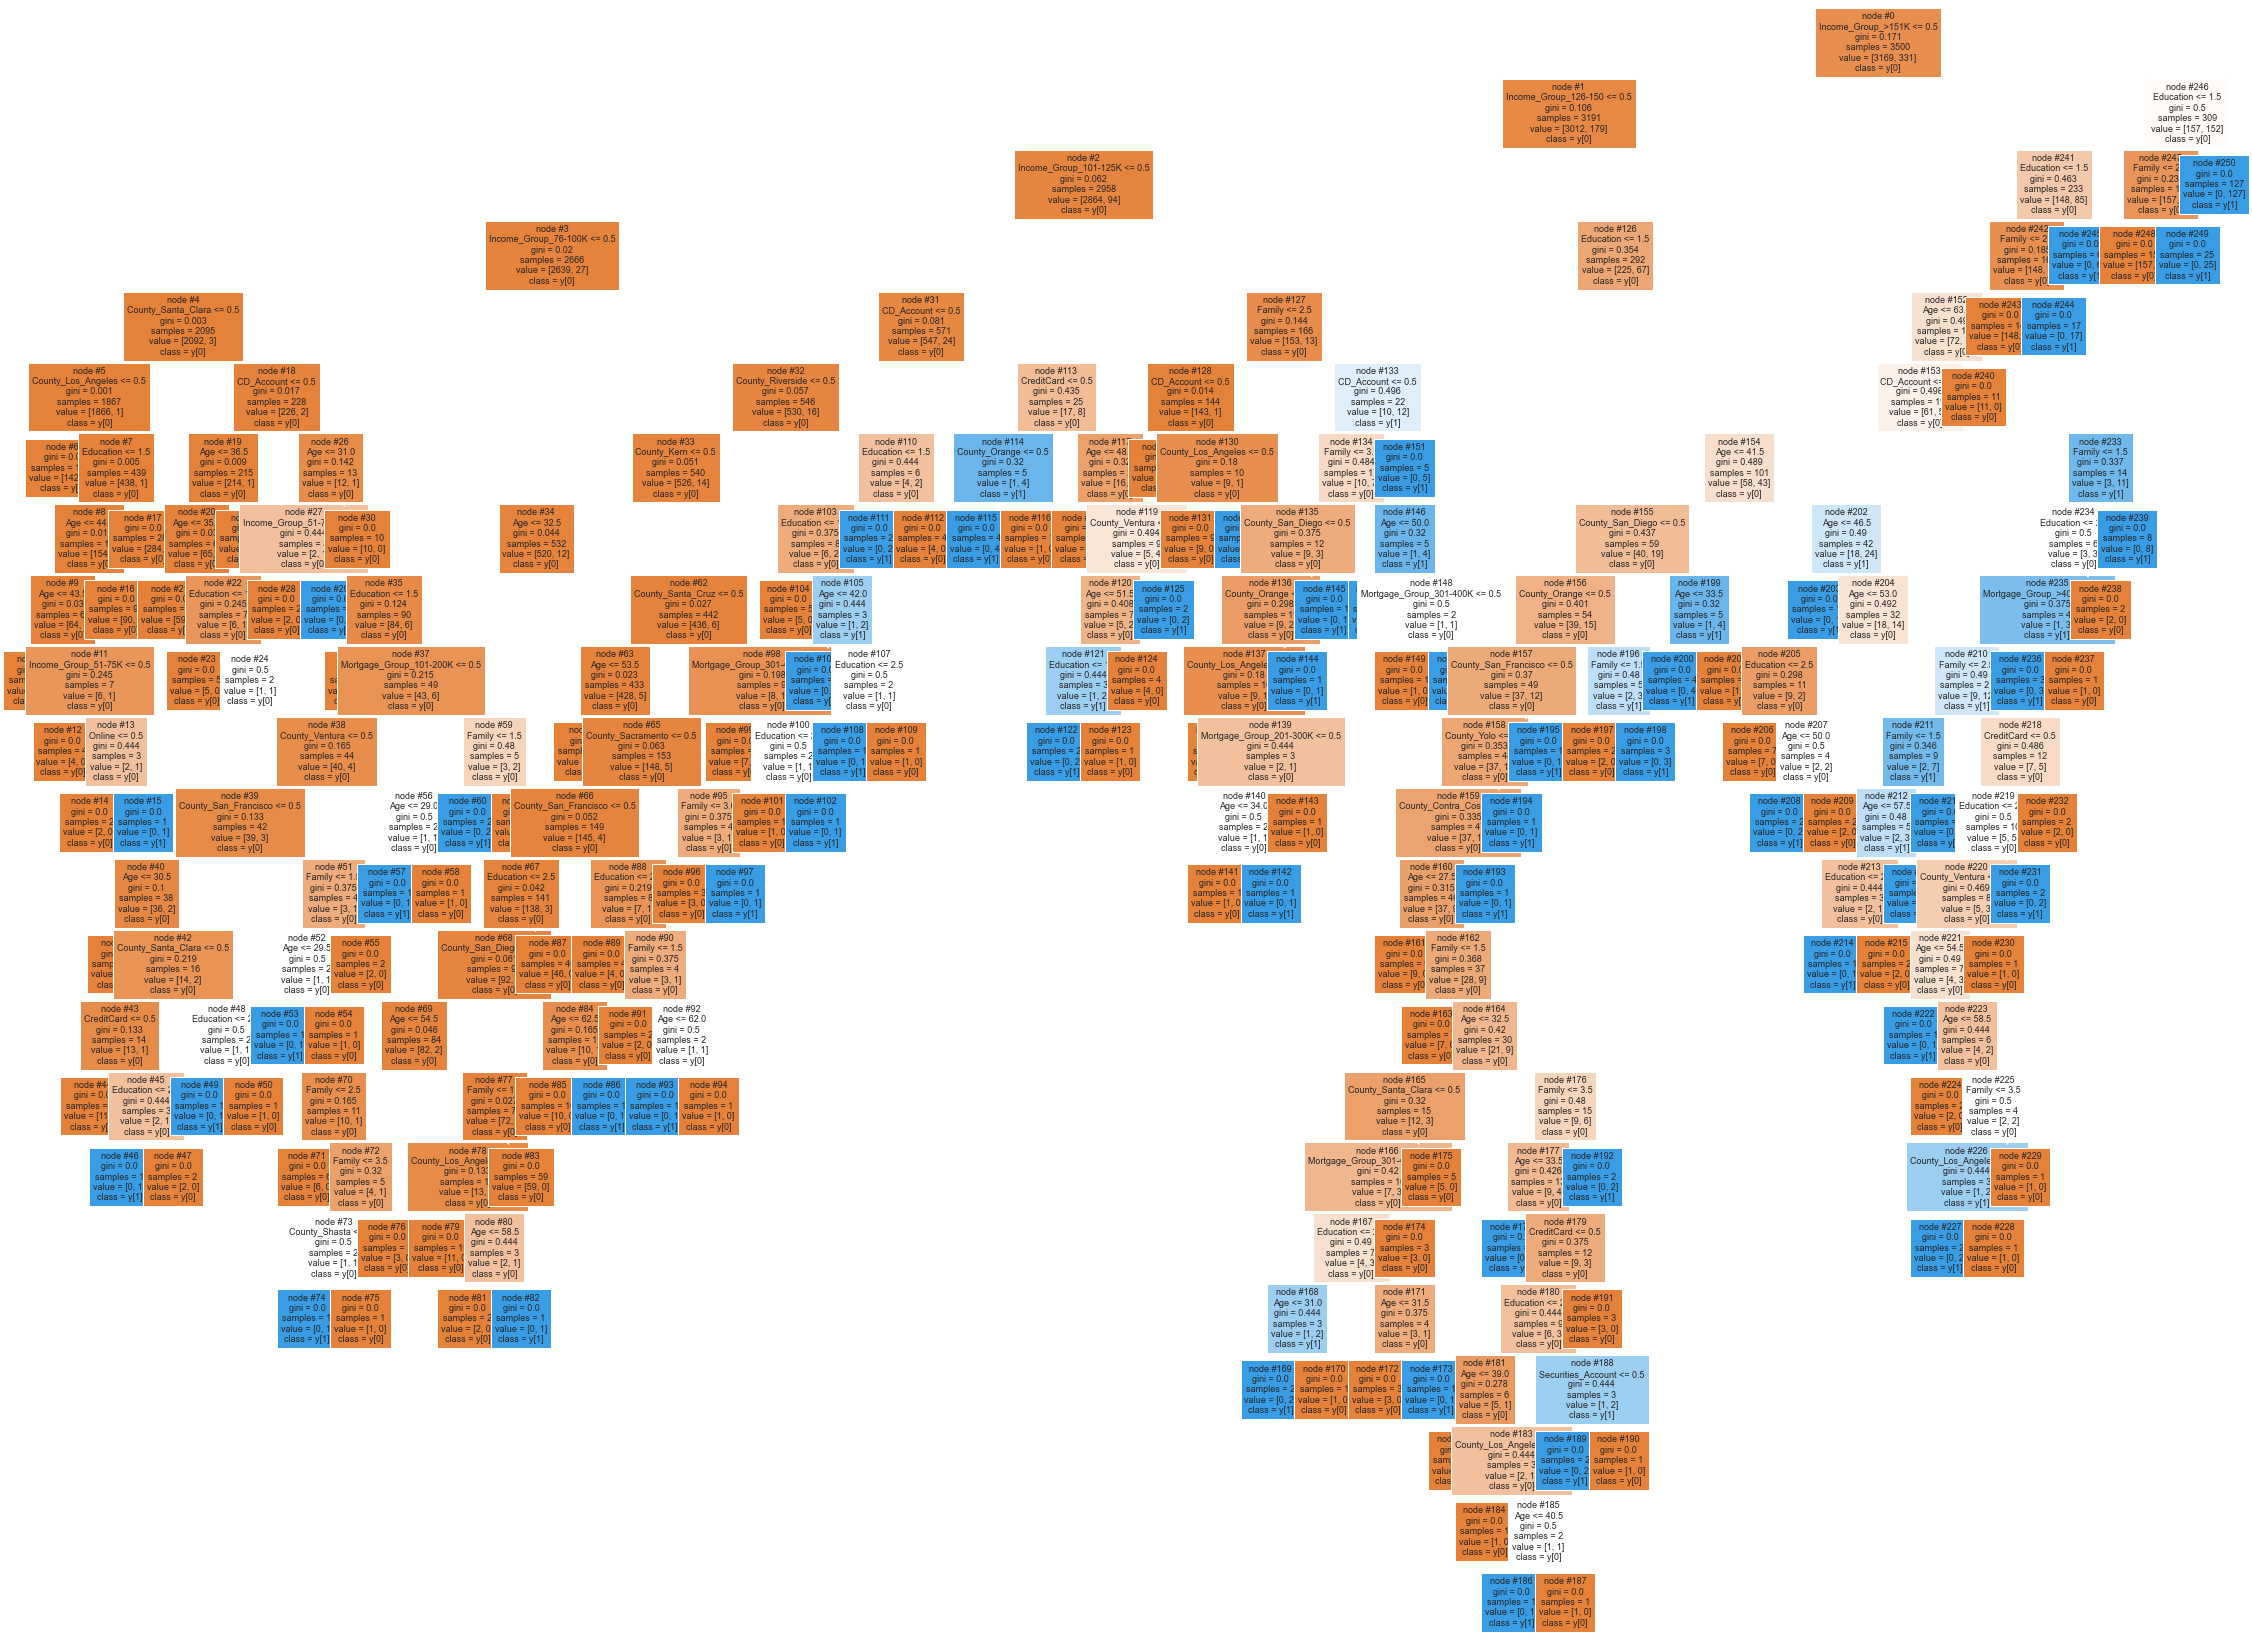

In [128]:
plt.figure(figsize=(40,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

* Income_Group_>151K is the root node
* Tree is very complex and will need to be pruned to avoid overfitting

In [129]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income_Group_>151K <= 0.50
|   |--- Income_Group_126-150 <= 0.50
|   |   |--- Income_Group_101-125K <= 0.50
|   |   |   |--- Income_Group_76-100K <= 0.50
|   |   |   |   |--- County_Santa_Clara <= 0.50
|   |   |   |   |   |--- County_Los_Angeles <= 0.50
|   |   |   |   |   |   |--- weights: [1428.00, 0.00] class: 0
|   |   |   |   |   |--- County_Los_Angeles >  0.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- Age <= 44.50
|   |   |   |   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |   |   |   |--- weights: [58.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |   |   |   |--- Income_Group_51-75K <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Income_Group_51-75K >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   | 

In [130]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Education                0.376080
Income_Group_>151K       0.178839
Family                   0.170762
Income_Group_126-150     0.080063
Age                      0.068370
Income_Group_101-125K    0.042312
CD_Account               0.017070
CreditCard               0.007916
County_Los_Angeles       0.007454
County_Orange            0.007047
County_San_Diego         0.006369
County_Ventura           0.004362
Mortgage_Group_301-400K  0.004260
Income_Group_51-75K      0.002865
County_San_Francisco     0.002689
Mortgage_Group_>401K     0.002507
Income_Group_76-100K     0.002472
Securities_Account       0.002228
Online                   0.002228
County_Santa_Clara       0.002123
County_Contra_Costa      0.002116
County_Yolo              0.002028
County_Riverside         0.001874
County_Shasta            0.001671
Mortgage_Group_101-200K  0.001434
County_Kern              0.001363
County_Sacramento        0.000648
Mortgage_Group_201-300K  0.000557
County_Santa_C

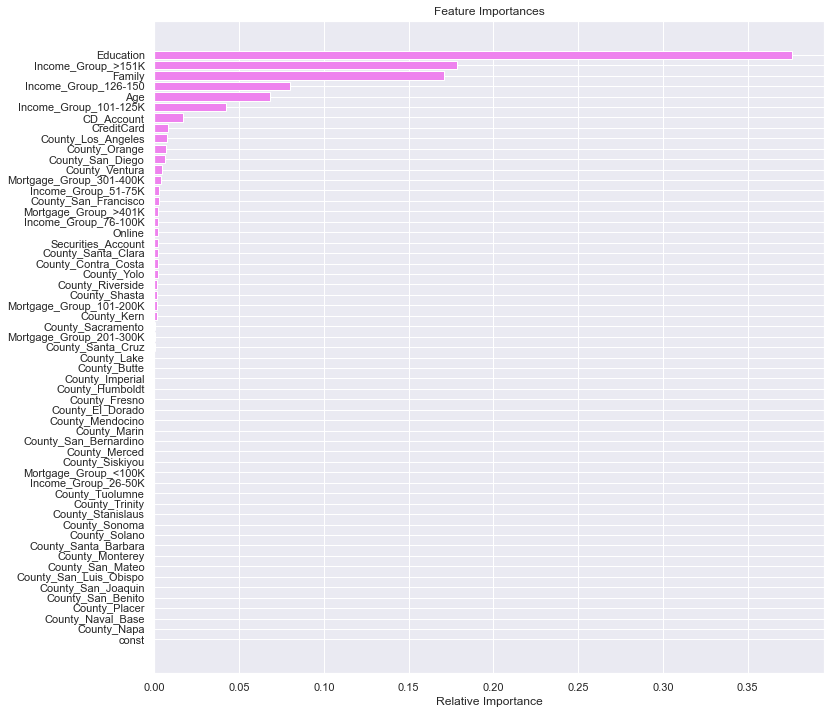

In [131]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decison tree Education is the most importnat variable for determining whether or not a customer will take out a personal loan

## Reducing over fitting

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 5

In [132]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

## Confusion Matrix - decision tree with depth restricted to 5

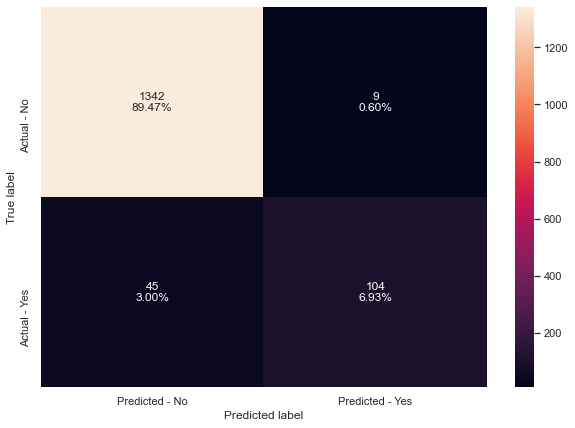

In [133]:
make_confusion_matrix(dTree1, y_test)

In [134]:
# Accuracy on train and test with Max Depth of 5
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9737142857142858
Accuracy on test set :  0.964
Recall on training set :  0.7522658610271903
Recall on test set :  0.697986577181208


Compare Accuracy and Recall to orginal decision tree


- Accuracy on training set :  0.9997142857142857
- Accuracy on test set :  0.9646666666666667
- Recall on training set :  0.9969788519637462
- Recall on test set :  0.8322147651006712


Recall on training set has reduced from 0.997 to 0.752 but this is an improvment because the model is not overfitting as much and Accuracy remains high

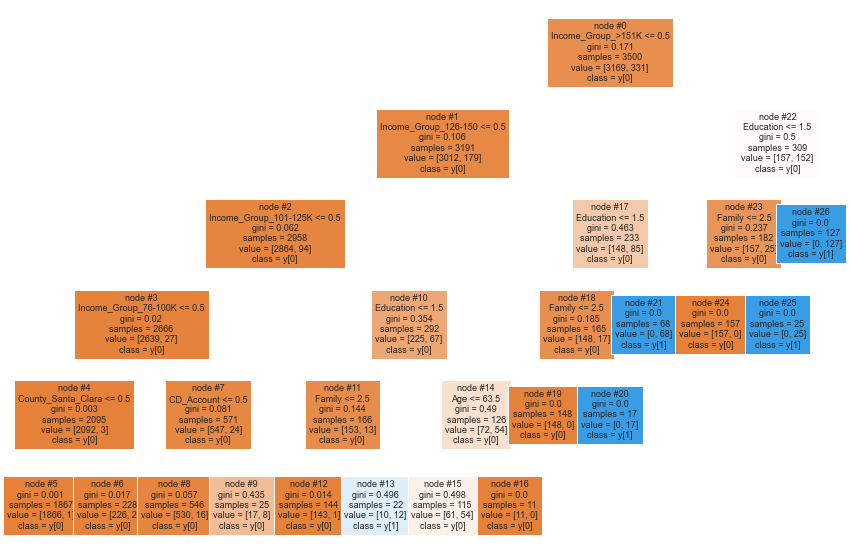

In [135]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [136]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Education                0.428810
Income_Group_>151K       0.222346
Family                   0.175975
Income_Group_126-150     0.099540
Income_Group_101-125K    0.052605
Age                      0.009199
CD_Account               0.008394
Income_Group_76-100K     0.003073
County_Santa_Clara       0.000057
County_Santa_Cruz        0.000000
County_Solano            0.000000
County_Siskiyou          0.000000
County_Shasta            0.000000
const                    0.000000
County_Stanislaus        0.000000
County_Santa_Barbara     0.000000
County_San_Mateo         0.000000
County_Sonoma            0.000000
County_Yolo              0.000000
County_Trinity           0.000000
County_Tuolumne          0.000000
County_Ventura           0.000000
County_San_Joaquin       0.000000
Income_Group_26-50K      0.000000
Income_Group_51-75K      0.000000
Mortgage_Group_<100K     0.000000
Mortgage_Group_101-200K  0.000000
Mortgage_Group_201-300K  0.000000
Mortgage_Group

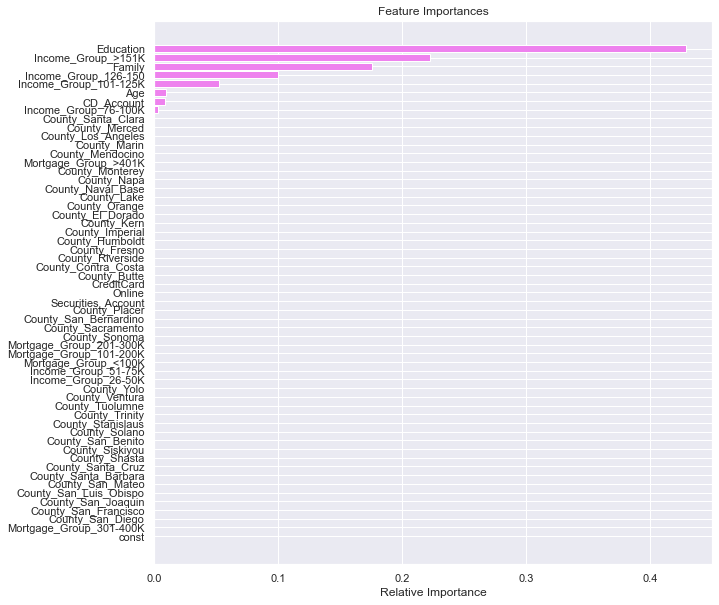

In [137]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Education level and higher incomes are still the most important variables followed by family size

## Using GridSearch for Hyperparameter tuning of our tree model

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

## Confusion Matrix - decision tree with tuned hyperparameters

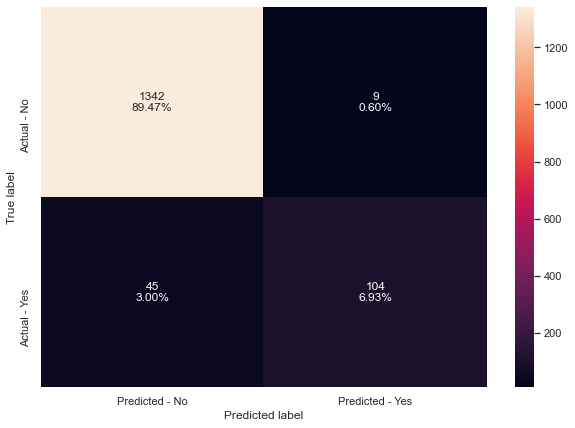

In [140]:
make_confusion_matrix(estimator,y_test)

In [141]:
# Accuracy on train and test with tuned hyperparaneters
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9737142857142858
Accuracy on test set :  0.964
Recall on training set :  0.7522658610271903
Recall on test set :  0.697986577181208


Compare to dtree1 with depth limited to 5 levels


- Accuracy on training set :  0.9737142857142858
- Accuracy on test set :  0.964
- Recall on training set :  0.7522658610271903
- Recall on test set :  0.697986577181208

Estimator chose the exact same depth with 5 levels as previous model

### Visualizing the Decision Tree with tuned hyperparameters

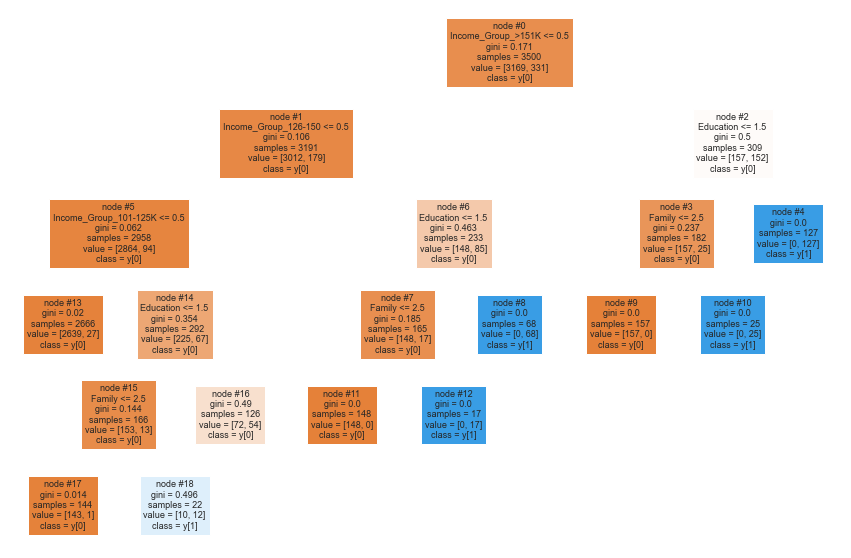

In [142]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

* Here we see the tree depth is similar to the limited version however the estimator produced a much simpler tree with less branches
* Income_Group_>151K continues to be the root node

In [143]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income_Group_>151K <= 0.50
|   |--- Income_Group_126-150 <= 0.50
|   |   |--- Income_Group_101-125K <= 0.50
|   |   |   |--- weights: [2639.00, 27.00] class: 0
|   |   |--- Income_Group_101-125K >  0.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- weights: [143.00, 1.00] class: 0
|   |   |   |   |--- Family >  2.50
|   |   |   |   |   |--- weights: [10.00, 12.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [72.00, 54.00] class: 0
|   |--- Income_Group_126-150 >  0.50
|   |   |--- Education <= 1.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [148.00, 0.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- weights: [0.00, 17.00] class: 1
|   |   |--- Education >  1.50
|   |   |   |--- weights: [0.00, 68.00] class: 1
|--- Income_Group_>151K >  0.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [157.00, 0.00] class: 0
|   |   |--- Family >  

In [144]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                              Imp
Education                0.437885
Income_Group_>151K       0.227051
Family                   0.179698
Income_Group_126-150     0.101647
Income_Group_101-125K    0.053718
County_Sonoma            0.000000
County_Solano            0.000000
County_Siskiyou          0.000000
County_Shasta            0.000000
County_Santa_Cruz        0.000000
const                    0.000000
County_Trinity           0.000000
County_Santa_Clara       0.000000
County_Santa_Barbara     0.000000
County_San_Mateo         0.000000
County_San_Luis_Obispo   0.000000
County_Stanislaus        0.000000
County_Yolo              0.000000
County_Tuolumne          0.000000
County_Ventura           0.000000
County_San_Francisco     0.000000
Income_Group_26-50K      0.000000
Income_Group_51-75K      0.000000
Income_Group_76-100K     0.000000
Mortgage_Group_<100K     0.000000
Mortgage_Group_101-200K  0.000000
Mortgage_Group_201-300K  0.000000
Mortgage_Group_301-400K  0.000000
County_San_Joa

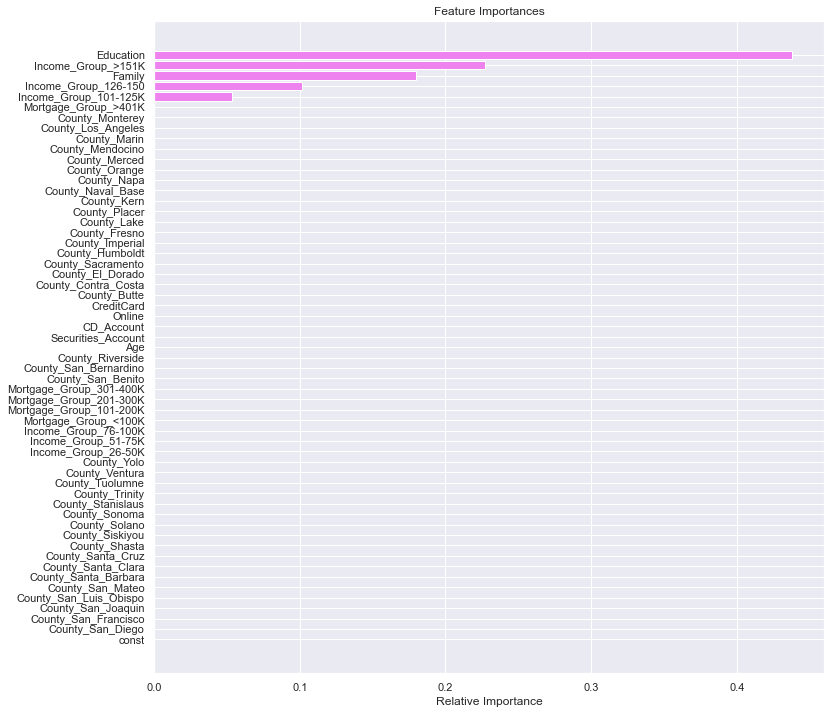

In [145]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Estimator greatly reduced the complexity of the tree
- Education continues to be the most important variable followed by Income and Family all other variables have been pruned by the estimator
- This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.


In [146]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [147]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000286
1     0.000094    0.000569
2     0.000095    0.001140
3     0.000143    0.001712
4     0.000159    0.002188
5     0.000159    0.004412
6     0.000171    0.004927
7     0.000190    0.005308
8     0.000193    0.006465
9     0.000199    0.008057
10    0.000214    0.009129
11    0.000229    0.009586
12    0.000243    0.010072
13    0.000270    0.010881
14    0.000274    0.012253
15    0.000284    0.012820
16    0.000296    0.014300
17    0.000296    0.015189
18    0.000298    0.015784
19    0.000311    0.017026
20    0.000347    0.018068
21    0.000355    0.018777
22    0.000381    0.019158
23    0.000383    0.019541
24    0.000386    0.020312
25    0.000429    0.021169
26    0.000435    0.021605
27    0.000454    0.022058
28    0.000457    0.022515
29    0.000457    0.022973
30    0.000468    0.023908
31    0.000490    0.024397
32    0.000506    0.025410
33    0.000541    0.026492
34    0.000559    0.027051
35    0.000610    0.027661
36    0.000626    0.028287
37    0.000713    0.029001
38    0.000764    0.029765
39    0.000800    0.032164
40    0.001053    0.035324
41    0.001265    0.036589
42    0.003162    0.039752
43    0.005022    0.044773
44    0.007234    0.052007
45    0.008713    0.060721
46    0.012323    0.073044
47    0.017914    0.108871
48    0.031192    0.171255

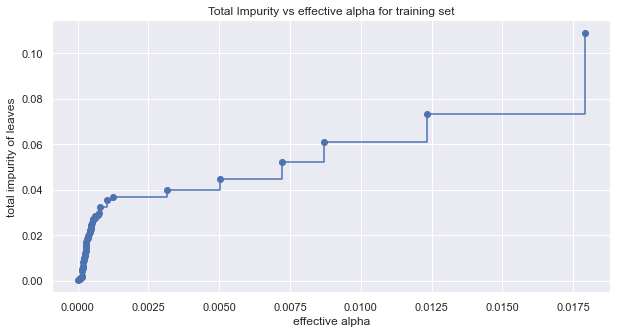

In [148]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [149]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.031191993153822067



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

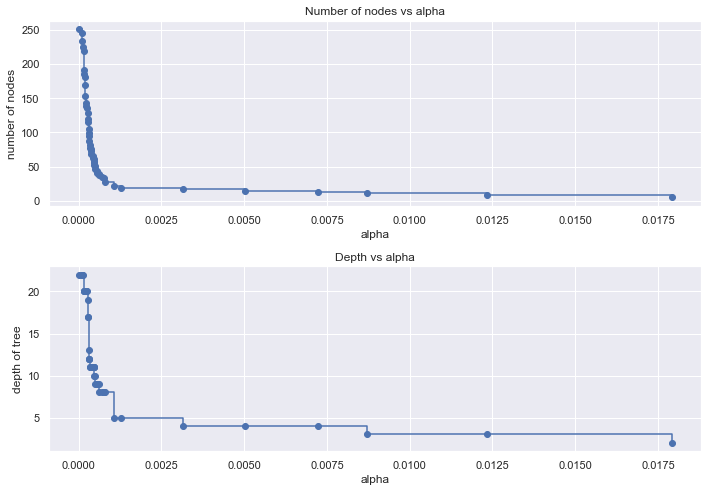

In [150]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- the above plots show that the optimal number of nodes fo reduce complexity and maintain lowest alpha is somewhere near 20
- the lower plot confirms what we learned earleir that 5 levels seems to be the optimal tree depth

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [151]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

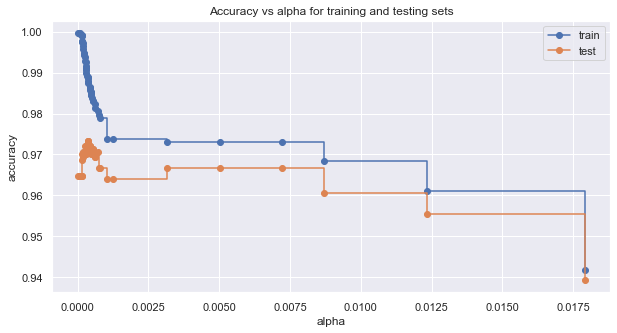

In [152]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Let's check Accuracy (TP+TN/TP+FP+FN+TN)

In [153]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0003545848748856264, random_state=1)
Training accuracy of best model:  0.9888571428571429
Test accuracy of best model:  0.9733333333333334


In [154]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

* Because or goal is predict whether or not a customer will buy a Personal Loan not whether or not they will default on a loan then Accuracy can be a good measure. 


* The downside of a False Positive is minimized because we can reject their application later in the underwriting process. 


* However, Recall maybe the better metric for our analysis because it helps answer the question of all the customers that prucahsed a loan, how many did we lable correctly?


### Let's check Recall (TP/TP+FN) 

* this may be our best metric

In [155]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [156]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

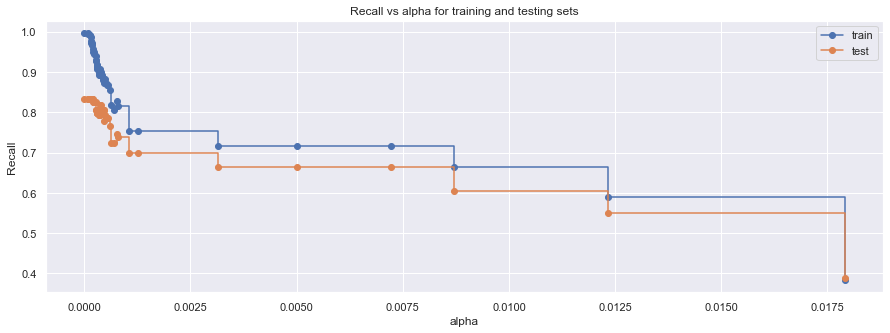

In [157]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [158]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


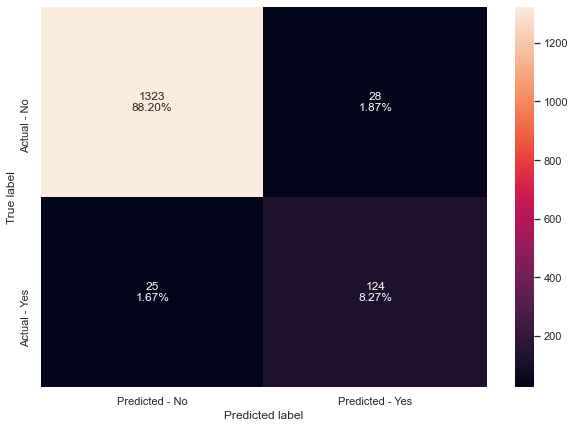

In [159]:
make_confusion_matrix(best_model,y_test)

In [160]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9969788519637462
Recall on test set :  0.8322147651006712


- high recall close to one on the training set could indicate overfitting

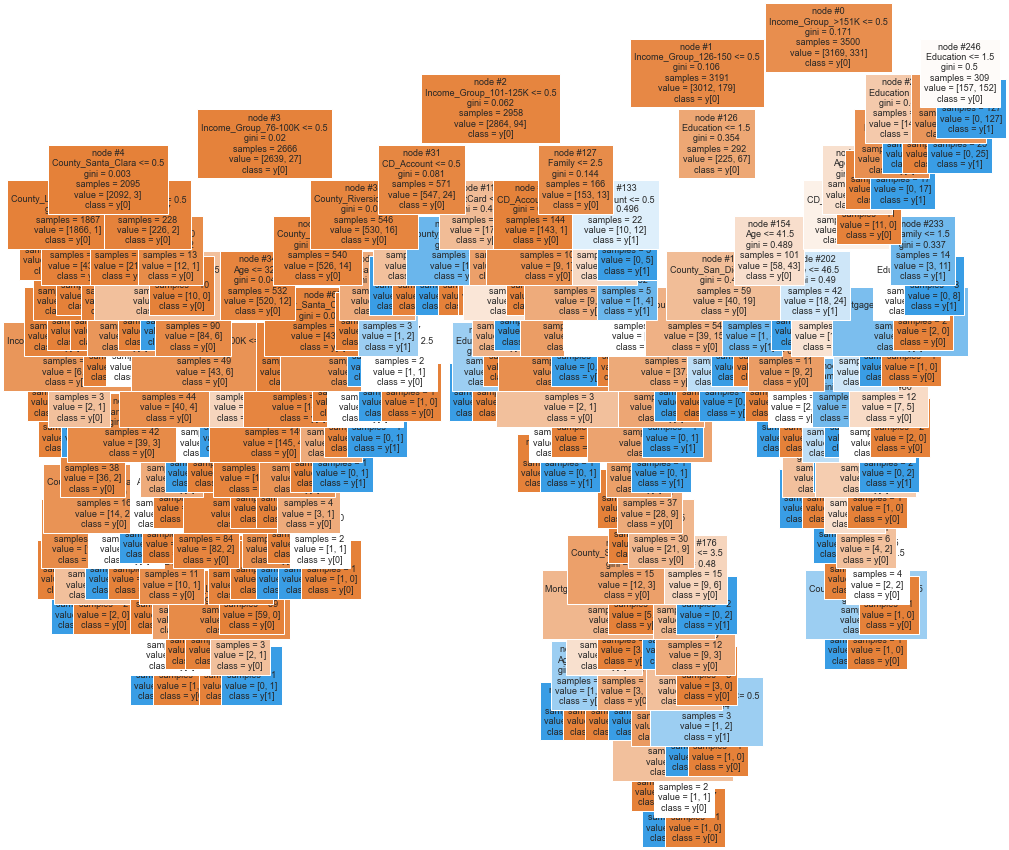

In [161]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

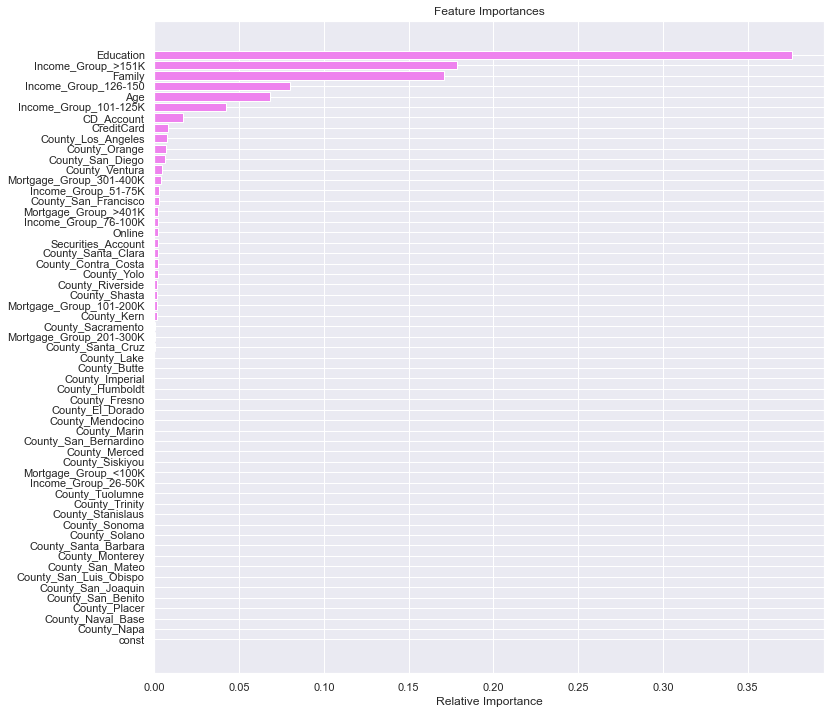

In [162]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [163]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning', 'Logistic Regression optimal threshold'], 'Train_Recall':[0.997,0.752,0.752,0.997,0.843], 'Test_Recall':[0.832,0.698,0.698,0.832,0.813],'Train_Accuracy':[0.999,0.974,0.974,0.989,0.961],'Test_Accuracy':[0.965,0.964,0.964,0.973,0.953]}) 
comparison_frame

Model  Train_Recall  Test_Recall  \
0                  Initial decision tree model         0.997        0.832   
1  Decision tree with restricted maximum depth         0.752        0.698   
2    Decision treee with hyperparameter tuning         0.752        0.698   
3              Decision tree with post-pruning         0.997        0.832   
4        Logistic Regression optimal threshold         0.843        0.813   

   Train_Accuracy  Test_Accuracy  
0           0.999          0.965  
1           0.974          0.964  
2           0.974          0.964  
3           0.989          0.973  
4           0.961          0.953

### Decison Tree Conclusion

- Although the initial decision tree and tree with post pruning produce the highest recall and accuracy numbers there may be some overfitting


- the Decision treee with hyperparameter tuning produced the simplest model and given there isn't a lot of downside to False Positive when simply identifying customers more likely to apply for a loan I will select the Decision treee with hyperparameter tuning	as it is the least complex and seems to be best fit for a generalized model

Decision treee with hyperparameter tuning is the best model because it produced the simplest model with comparable scores

## Compare Logistic Regression to Decison Tree Modeling

In [164]:
- Logistic Regression produces a very usable model wich can be argued is superiror given the coefficent data and that metrics seems to be less overfitting


- Decision Tree is much more efficient in terms of speed to get results. It's flexiility requires less Pre-Processing of data and thus can get results faster.

SyntaxError: invalid syntax (<ipython-input-164-1092dc788fba>, line 1)

### Key Insights

#### OBJECTIVES


**To predict whether a liability customer will buy a personal loan or not.**

We can fairly conclude that our models are generally good at predicting whether or not a customer is more likely than other customers to take our a personal loan 


**Which variables are most significant.**

Annual Income, Education, and Family Size are the most significant positive predictors of whether or not a customer will take out a personal loan. Securities accounts, online banking, or a credit card from another institution were negative indicators.


**Which segment of customers should be targeted more.**

Somewhat counter intuitively, All Life Bank should target customers with higher incomes, more education and bigger families as they are the most likely to take out a personal loan. As importantly, they are also the most likely to pay it back.  


### BUSINESS RECOMMENDATIONS


**Key Insight: Customers with higher incomes are more likely to take out a personal loan**

Recommendation: Target these customers with marketing around big ticket and luxury purchases such as vacations, jewelry, and other non-essential items.

**Key Insight -  Customers with bigger families are more likely to take out a personal loan**

Recommendation: Target these customers with family centric uses of funds such as family vacations, school trips, private education, sporting events, concerts, electronics and other big ticket purchases particularly during the holidays

**Key Insight -  Higher Educated customers are more likely to take out a personal loan**

Recommendation: The company should look to focus their advertising at recent graduate of Graduate or PHD level schools with enticing ads for celebrating their achievements or funds for celebration because “you’ve earned it.”

**Key Insight -  Customers with Securities Accounts, Credit Cards from other banks and who bank online are less likely to take out a personal loan**

Recommendation: These may indicate more sophisticated customers  with more reserved spending habits. Target them with other products such as home mortgages since  69.2% of the banks customers do not have a mortgage. 
 
**BONUS - Target customers in Northern California versus Southern California as a area for growth.** 
